## Introduction 
Hello! This is a project with domain voice gender recognition.
We have to extract some features from our mp3 data and then with some deep learning methods to predict the gender of this voice record.

Content:<br>
* [1.Spanish](#Spanish)
* [2.English](#English)
* [3.French](#French)
* [4.German](#German)
* [5.Catalan](#Catalan)
* [6.Russian](#Russian)
* [7.Portuguese](#Portuguese)
* [8.Polish](#Polish)
* [9.Esperanto](#Esperanto)
* [10.Netherlands/ Dutch](#Dutch)
* [11.Japanese](#Japanese)
* [12.Euskaltzaindia - Basque language](#Euskaltzaindia)
* [13.Arabic](#Arabic)
* [14.Cymraeg - Welsh language](#Cymraeg)
* [15.Czech Republic](#Czech)
* [16.Turkish](#Turkish)
* [17.Kabyle](#Kabyle)
* [18.Singapore (Mandarin Chinese)](#Singapore)
* [19.West Frisian](#WestFrisian)
* [20.Indonesian](#Indonesian)
* [21.Cape Verde](#CapeVerde)
* [23.Trinidad and Tobago](#Trinidad)
* [24.Breton](#Breton)
* [25.Georgian](#Georgian)
* [26.Swedish](#Swedish)
* [27.Rwanda](#Rwanda)
* [28.Chinese (Traditional, Hong Kong S.A.R.)](#ChineseTraditional)
* [29.Chinese (PRC=People's Republic of China)](#Chinese)
* [30.Chinese (Taiwan)](#Taiwan)

###### Team members: Name (Registration Number):
###### Malfa_Ilia (2022202004011), Lertas_Giorgos (2022202004010)

In [1]:
#Country Condes
#https://wiki.openstreetmap.org/wiki/Nominatim/Country_Codes

import numpy as np
import pandas as pd
import librosa

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

allLanguagesGenderCount = pd.DataFrame()

## 1.Spanish
<a id="Spanish"></a> 

Counter for values:
           es
NaN     46242
male    11423
female   5655
other     176


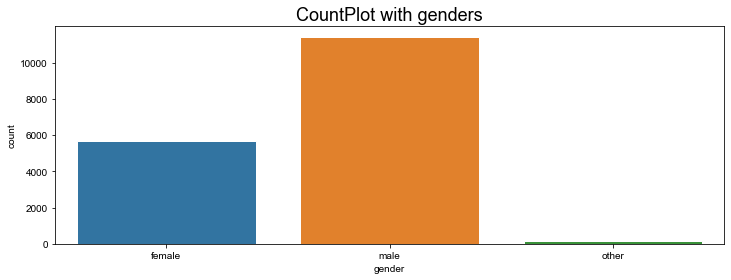

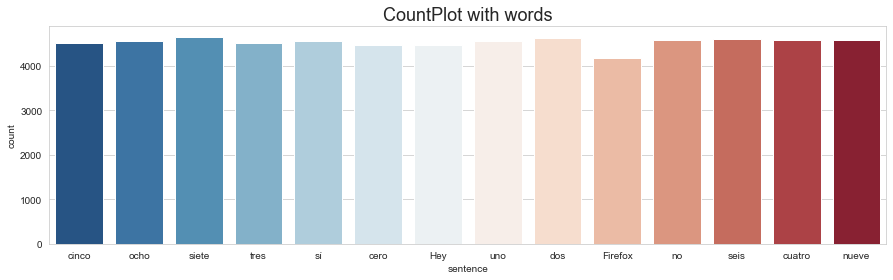

In [2]:
#load tsv in this language
#Ilia data paths
"""
es_dev = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/es/dev.tsv',sep='	')
es_inval = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/es/invalidated.tsv',sep='	')
es_other = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/es/other.tsv',sep='	')
es_reported = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/es/reported.tsv',sep='	')
es_test = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/es/test.tsv',sep='	')
es_train = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/es/train.tsv',sep='	')
es_val = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/es/validated.tsv',sep='	')
"""
#George data paths
es_dev = pd.read_csv('gender data/es/dev.tsv',sep='	')
es_inval = pd.read_csv('gender data/es/invalidated.tsv',sep='	')
es_other = pd.read_csv('gender data/es/other.tsv',sep='	')
es_reported = pd.read_csv('gender data/es/reported.tsv',sep='	')
es_test = pd.read_csv('gender data/es/test.tsv',sep='	')
es_train = pd.read_csv('gender data/es/train.tsv',sep='	')
es_val = pd.read_csv('gender data/es/validated.tsv',sep='	')

#keep the attributes that we need
es_dev=es_dev[['path','sentence','age','gender']]
es_inval=es_dev[['path','sentence','age','gender']]
es_other=es_other[['path','sentence','age','gender']]
es_test=es_test[['path','sentence','age','gender']]
es_train=es_train[['path','sentence','age','gender']]
es_val=es_val[['path','sentence','age','gender']]

#concatenation
es_concat=pd.concat([es_dev, es_inval, es_other, es_test, es_train, es_val]).drop_duplicates()

#70.038 are all the voice records - 63.496 our instances
print('Counter for values:')
allLanguagesGenderCount['es'] =es_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=es_concat['gender'],data=es_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=es_concat['sentence'],data=es_concat,palette='RdBu_r');

## 2.English
<a id="English"></a> 

Counter for values:
           es     en
NaN     46242  27274
male    11423  13485
female   5655   4098
other     176    442


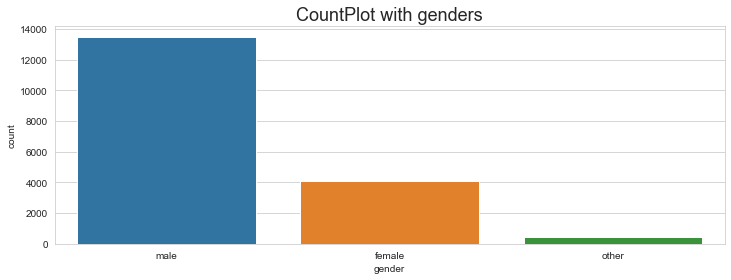

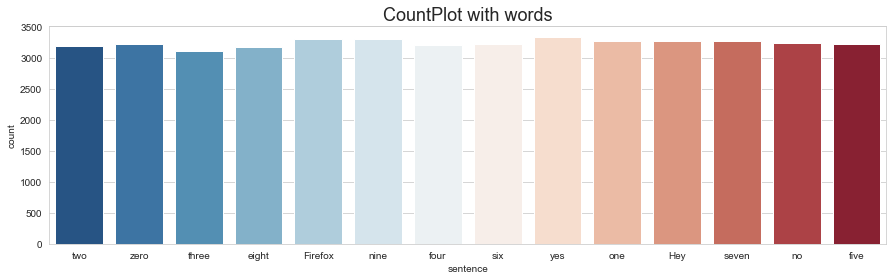

In [3]:
#load tsv in this language
#Ilia data paths
"""
en_dev = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/en/dev.tsv',sep='	')
en_inval = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/en/invalidated.tsv',sep='	')
en_other = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/en/other.tsv',sep='	')
en_reported = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/en/reported.tsv',sep='	')
en_test = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/en/test.tsv',sep='	')
en_train = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/en/train.tsv',sep='	')
en_val = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/en/validated.tsv',sep='	')
"""
#George data paths
en_dev = pd.read_csv('gender data/en/dev.tsv',sep='	')
en_inval = pd.read_csv('gender data/en/invalidated.tsv',sep='	')
en_other = pd.read_csv('gender data/en/other.tsv',sep='	')
en_reported = pd.read_csv('gender data/en/reported.tsv',sep='	')
en_test = pd.read_csv('gender data/en/test.tsv',sep='	')
en_train = pd.read_csv('gender data/en/train.tsv',sep='	')
en_val = pd.read_csv('gender data/en/validated.tsv',sep='	')

#keep the attributes that we need
en_dev=en_dev[['path','sentence','age','gender']]
en_inval=en_dev[['path','sentence','age','gender']]
en_other=en_other[['path','sentence','age','gender']]
en_test=en_test[['path','sentence','age','gender']]
en_train=en_train[['path','sentence','age','gender']]
en_val=en_val[['path','sentence','age','gender']]

#concatenation of datasets
en_concat=pd.concat([en_dev, en_inval, en_other, en_test, en_train, en_val]).drop_duplicates()

#49.370 are all the voice records - 45.299 our instances
print('Counter for values:')
allLanguagesGenderCount['en'] =en_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=en_concat['gender'],data=en_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=en_concat['sentence'],data=en_concat,palette='RdBu_r');

## 3.French
<a id="French"></a> 

Counter for values:
           es     en     fr
NaN     46242  27274  13723
male    11423  13485   4952
female   5655   4098   1231
other     176    442    131


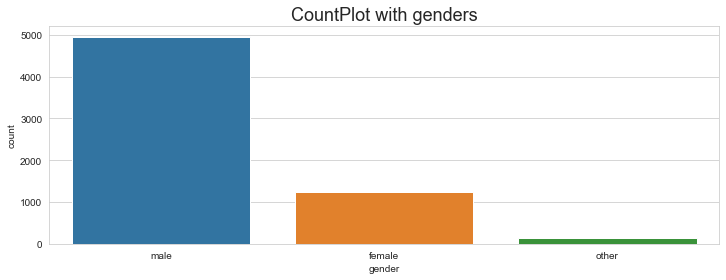

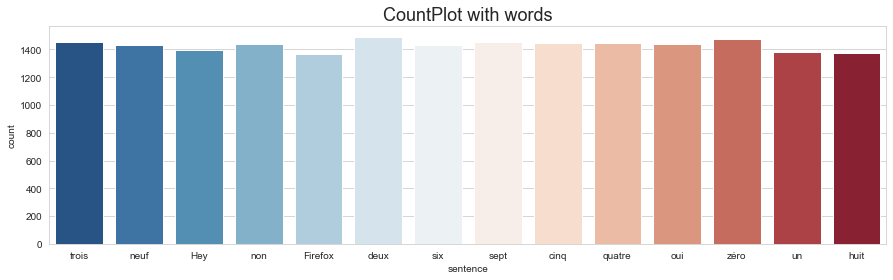

In [4]:
#load tsv in this language
#Ilia data paths
"""
fr_dev = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/fr/dev.tsv',sep='	')
fr_inval = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/fr/invalidated.tsv',sep='	')
fr_other = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/fr/other.tsv',sep='	')
fr_reported = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/fr/reported.tsv',sep='	')
fr_test = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/fr/test.tsv',sep='	')
fr_train = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/fr/train.tsv',sep='	')
fr_val = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/fr/validated.tsv',sep='	')
"""
#George data paths
fr_dev = pd.read_csv('gender data/fr/dev.tsv',sep='	')
fr_inval = pd.read_csv('gender data/fr/invalidated.tsv',sep='	')
fr_other = pd.read_csv('gender data/fr/other.tsv',sep='	')
fr_reported = pd.read_csv('gender data/fr/reported.tsv',sep='	')
fr_test = pd.read_csv('gender data/fr/test.tsv',sep='	')
fr_train = pd.read_csv('gender data/fr/train.tsv',sep='	')
fr_val = pd.read_csv('gender data/fr/validated.tsv',sep='	')

#keep the attributes that we need
fr_dev=fr_dev[['path','sentence','age','gender']]
fr_inval=fr_dev[['path','sentence','age','gender']]
fr_other=fr_other[['path','sentence','age','gender']]
fr_test=fr_test[['path','sentence','age','gender']]
fr_train=fr_train[['path','sentence','age','gender']]
fr_val=fr_val[['path','sentence','age','gender']]

#concatenation
fr_concat=pd.concat([fr_dev, fr_inval, fr_other, fr_test, fr_train, fr_val]).drop_duplicates()

#22.382 are all the voice records - 20.037 our instances
print('Counter for values:')
allLanguagesGenderCount['fr'] =fr_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=fr_concat['gender'],data=fr_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=fr_concat['sentence'],data=fr_concat,palette='RdBu_r');

## 4.German
<a id="German"></a> 

Counter for values:
           es     en     fr    de
NaN     46242  27274  13723  8513
male    11423  13485   4952  4345
female   5655   4098   1231   802
other     176    442    131    44


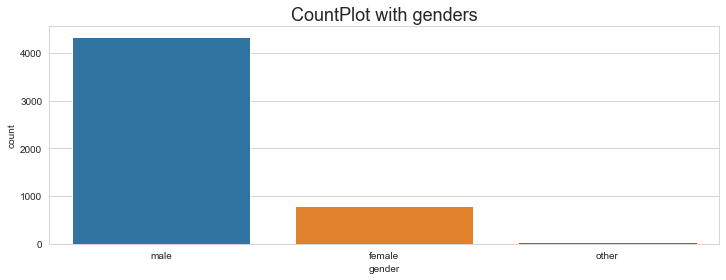

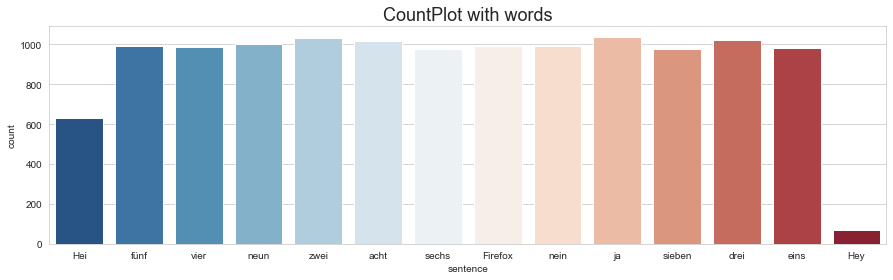

In [5]:
#load tsv in this language
#Ilia data paths
"""
de_dev = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/de/dev.tsv',sep='	')
de_inval = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/de/invalidated.tsv',sep='	')
de_other = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/de/other.tsv',sep='	')
de_reported = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/de/reported.tsv',sep='	')
de_test = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/de/test.tsv',sep='	')
de_train = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/de/train.tsv',sep='	')
de_val = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/de/validated.tsv',sep='	')
"""
#George data paths
de_dev = pd.read_csv('gender data/de/dev.tsv',sep='	')
de_inval = pd.read_csv('gender data/de/invalidated.tsv',sep='	')
de_other = pd.read_csv('gender data/de/other.tsv',sep='	')
de_reported = pd.read_csv('gender data/de/reported.tsv',sep='	')
de_test = pd.read_csv('gender data/de/test.tsv',sep='	')
de_train = pd.read_csv('gender data/de/train.tsv',sep='	')
de_val = pd.read_csv('gender data/de/validated.tsv',sep='	')

#keep the attributes that we need
de_dev=de_dev[['path','sentence','age','gender']]
de_inval=de_dev[['path','sentence','age','gender']]
de_other=de_other[['path','sentence','age','gender']]
de_test=de_test[['path','sentence','age','gender']]
de_train=de_train[['path','sentence','age','gender']]
de_val=de_val[['path','sentence','age','gender']]

#concatenation
de_concat=pd.concat([de_dev, de_inval, de_other, de_test, de_train, de_val]).drop_duplicates()

#15.090 are all the voice records - 13.704 our instances
print('Counter for values:')
allLanguagesGenderCount['de'] =de_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=de_concat['gender'],data=de_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=de_concat['sentence'],data=de_concat,palette='RdBu_r');

## 5.Catalan
<a id="Catalan"></a> 

Counter for values:
           es     en     fr    de    ca
NaN     46242  27274  13723  8513  2087
male    11423  13485   4952  4345  1384
female   5655   4098   1231   802   479
other     176    442    131    44    13


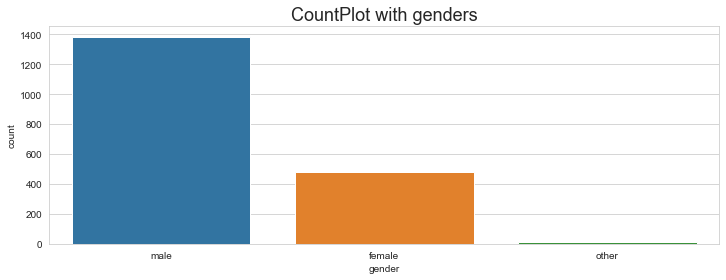

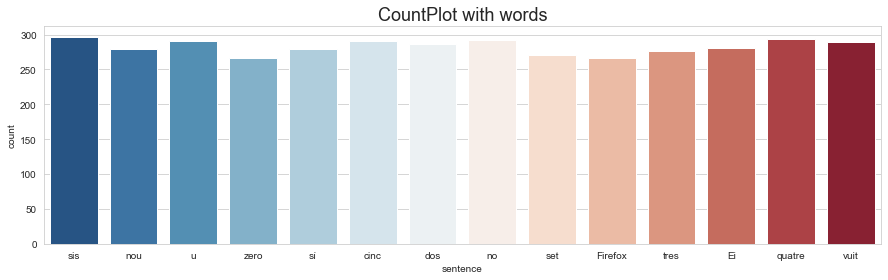

In [6]:
#load tsv in this language
#Ilia data paths
"""
ca_dev = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ca/dev.tsv',sep='	')
ca_inval = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ca/invalidated.tsv',sep='	')
ca_other = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ca/other.tsv',sep='	')
ca_reported = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ca/reported.tsv',sep='	')
ca_test = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ca/test.tsv',sep='	')
ca_train = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ca/train.tsv',sep='	')
ca_val = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ca/validated.tsv',sep='	')
"""
#George data paths
ca_dev = pd.read_csv('gender data/ca/dev.tsv',sep='	')
ca_inval = pd.read_csv('gender data/ca/invalidated.tsv',sep='	')
ca_other = pd.read_csv('gender data/ca/other.tsv',sep='	')
ca_reported = pd.read_csv('gender data/ca/reported.tsv',sep='	')
ca_test = pd.read_csv('gender data/ca/test.tsv',sep='	')
ca_train = pd.read_csv('gender data/ca/train.tsv',sep='	')
ca_val = pd.read_csv('gender data/ca/validated.tsv',sep='	')

#keep the attributes that we need
ca_dev=ca_dev[['path','sentence','age','gender']]
ca_inval=ca_dev[['path','sentence','age','gender']]
ca_other=ca_other[['path','sentence','age','gender']]
ca_test=ca_test[['path','sentence','age','gender']]
ca_train=ca_train[['path','sentence','age','gender']]
ca_val=ca_val[['path','sentence','age','gender']]

#concatenation
ca_concat=pd.concat([ca_dev, ca_inval, ca_other, ca_test, ca_train, ca_val]).drop_duplicates()

#4.180 are all the voice records - 3.963 our instances
print('Counter for values:')
allLanguagesGenderCount['ca'] =ca_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=ca_concat['gender'],data=ca_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=ca_concat['sentence'],data=ca_concat,palette='RdBu_r');

## 6.Russian
<a id="Russian"></a> 

Counter for values:
           es     en     fr    de    ca   ru
NaN     46242  27274  13723  8513  2087  979
male    11423  13485   4952  4345  1384  976
female   5655   4098   1231   802   479  122
other     176    442    131    44    13   14


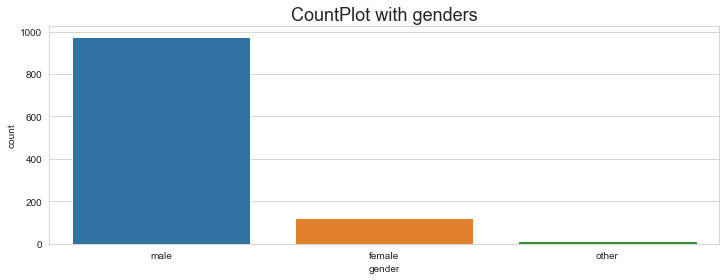

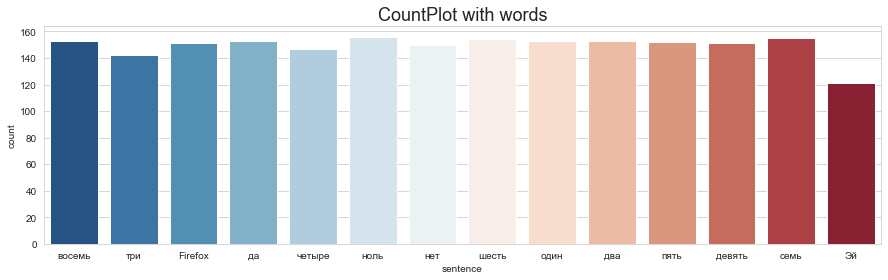

In [7]:
#load tsv in this language
#Ilia data paths
"""
ru_dev = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ru/dev.tsv',sep='	')
ru_inval = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ru/invalidated.tsv',sep='	')
ru_other = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ru/other.tsv',sep='	')
ru_reported = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ru/reported.tsv',sep='	')
ru_test = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ru/test.tsv',sep='	')
ru_train = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ru/train.tsv',sep='	')
ru_val = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ru/validated.tsv',sep='	')
"""
#George data paths
ru_dev = pd.read_csv('gender data/ru/dev.tsv',sep='	')
ru_inval = pd.read_csv('gender data/ru/invalidated.tsv',sep='	')
ru_other = pd.read_csv('gender data/ru/other.tsv',sep='	')
ru_reported = pd.read_csv('gender data/ru/reported.tsv',sep='	')
ru_test = pd.read_csv('gender data/ru/test.tsv',sep='	')
ru_train = pd.read_csv('gender data/ru/train.tsv',sep='	')
ru_val = pd.read_csv('gender data/ru/validated.tsv',sep='	')

#keep the attributes that we need
ru_dev=ru_dev[['path','sentence','age','gender']]
ru_inval=ru_dev[['path','sentence','age','gender']]
ru_other=ru_other[['path','sentence','age','gender']]
ru_test=ru_test[['path','sentence','age','gender']]
ru_train=ru_train[['path','sentence','age','gender']]
ru_val=ru_val[['path','sentence','age','gender']]

#concatenation
ru_concat=pd.concat([ru_dev, ru_inval, ru_other, ru_test, ru_train, ru_val]).drop_duplicates()

#2.195 are all the voice records - 2.091 our instances
print('Counter for values:')
allLanguagesGenderCount['ru'] =ru_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=ru_concat['gender'],data=ru_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=ru_concat['sentence'],data=ru_concat,palette='RdBu_r');

## 7.Portuguese
<a id="Portuguese"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt
NaN     46242  27274  13723  8513  2087  979  464
male    11423  13485   4952  4345  1384  976  678
female   5655   4098   1231   802   479  122   66
other     176    442    131    44    13   14   12


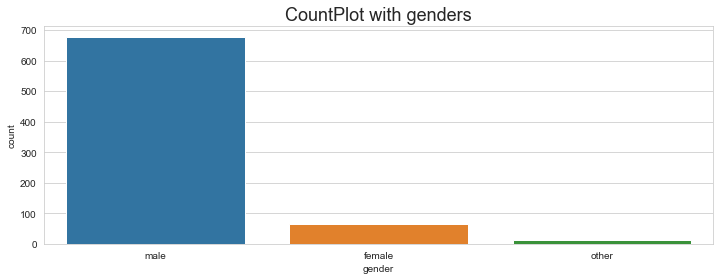

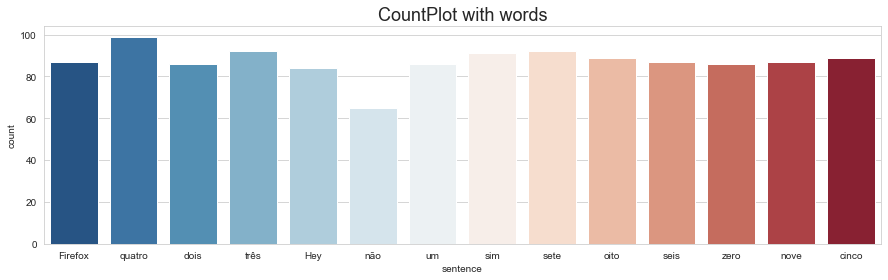

In [8]:
#load tsv in this language
#Ilia data paths
"""
pt_dev = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/pt/dev.tsv',sep='	')
pt_inval = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/pt/invalidated.tsv',sep='	')
pt_other = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/pt/other.tsv',sep='	')
pt_reported = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/pt/reported.tsv',sep='	')
pt_test = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/pt/test.tsv',sep='	')
pt_train = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/pt/train.tsv',sep='	')
pt_val = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/pt/validated.tsv',sep='	')
"""
#George data paths
pt_dev = pd.read_csv('gender data/pt/dev.tsv',sep='	')
pt_inval = pd.read_csv('gender data/pt/invalidated.tsv',sep='	')
pt_other = pd.read_csv('gender data/pt/other.tsv',sep='	')
pt_reported = pd.read_csv('gender data/pt/reported.tsv',sep='	')
pt_test = pd.read_csv('gender data/pt/test.tsv',sep='	')
pt_train = pd.read_csv('gender data/pt/train.tsv',sep='	')
pt_val = pd.read_csv('gender data/pt/validated.tsv',sep='	')

#keep the attributes that we need
pt_dev=pt_dev[['path','sentence','age','gender']]
pt_inval=pt_dev[['path','sentence','age','gender']]
pt_other=pt_other[['path','sentence','age','gender']]
pt_test=pt_test[['path','sentence','age','gender']]
pt_train=pt_train[['path','sentence','age','gender']]
pt_val=pt_val[['path','sentence','age','gender']]

#concatenation
pt_concat=pd.concat([pt_dev, pt_inval, pt_other, pt_test, pt_train, pt_val]).drop_duplicates()

#1.307 are all the voice records - 1.220 our instances
print('Counter for values:')
allLanguagesGenderCount['pt'] =pt_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=pt_concat['gender'],data=pt_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=pt_concat['sentence'],data=pt_concat,palette='RdBu_r');

## 8.Polish
<a id="Polish"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl
NaN     46242  27274  13723  8513  2087  979  464  535
male    11423  13485   4952  4345  1384  976  678  453
female   5655   4098   1231   802   479  122   66  147
other     176    442    131    44    13   14   12   10


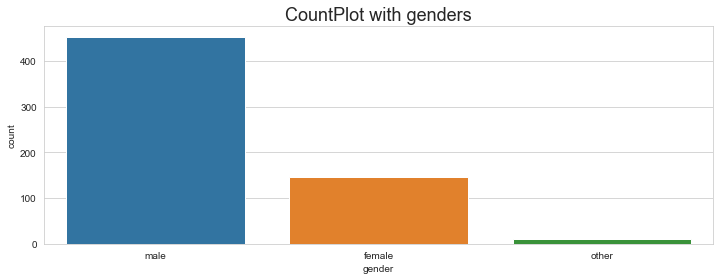

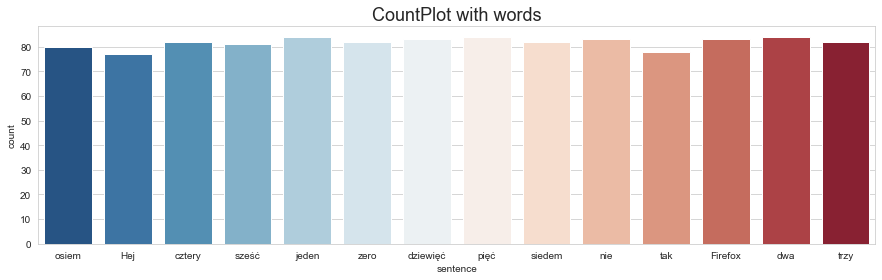

In [9]:
#load tsv in this language
#Ilia data paths
"""
pl_dev = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/pl/dev.tsv',sep='	')
pl_inval = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/pl/invalidated.tsv',sep='	')
pl_other = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/pl/other.tsv',sep='	')
pl_reported = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/pl/reported.tsv',sep='	')
pl_test = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/pl/test.tsv',sep='	')
pl_train = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/pl/train.tsv',sep='	')
pl_val = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/pl/validated.tsv',sep='	')
"""
#George data paths
pl_dev = pd.read_csv('gender data/pl/dev.tsv',sep='	')
pl_inval = pd.read_csv('gender data/pl/invalidated.tsv',sep='	')
pl_other = pd.read_csv('gender data/pl/other.tsv',sep='	')
pl_reported = pd.read_csv('gender data/pl/reported.tsv',sep='	')
pl_test = pd.read_csv('gender data/pl/test.tsv',sep='	')
pl_train = pd.read_csv('gender data/pl/train.tsv',sep='	')
pl_val = pd.read_csv('gender data/pl/validated.tsv',sep='	')

#keep the attributes that we need
pl_dev=pl_dev[['path','sentence','age','gender']]
pl_inval=pl_dev[['path','sentence','age','gender']]
pl_other=pl_other[['path','sentence','age','gender']]
pl_test=pl_test[['path','sentence','age','gender']]
pl_train=pl_train[['path','sentence','age','gender']]
pl_val=pl_val[['path','sentence','age','gender']]

#concatenation
pl_concat=pd.concat([pl_dev, pl_inval, pl_other, pl_test, pl_train, pl_val]).drop_duplicates()

#1.182 are all the voice records - 1.145 our instances
print('Counter for values:')
allLanguagesGenderCount['pl'] =pl_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=pl_concat['gender'],data=pl_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=pl_concat['sentence'],data=pl_concat,palette='RdBu_r');

## 9.Esperanto
<a id="Esperanto"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo
NaN     46242  27274  13723  8513  2087  979  464  535  419
male    11423  13485   4952  4345  1384  976  678  453  450
female   5655   4098   1231   802   479  122   66  147   45
other     176    442    131    44    13   14   12   10   10


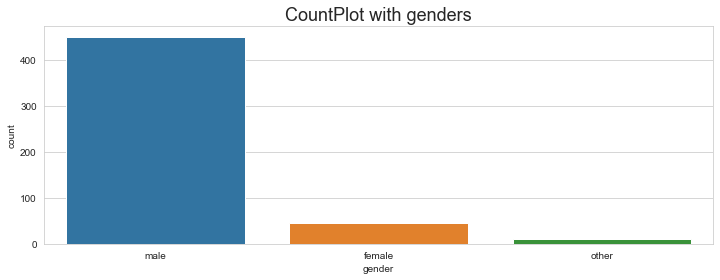

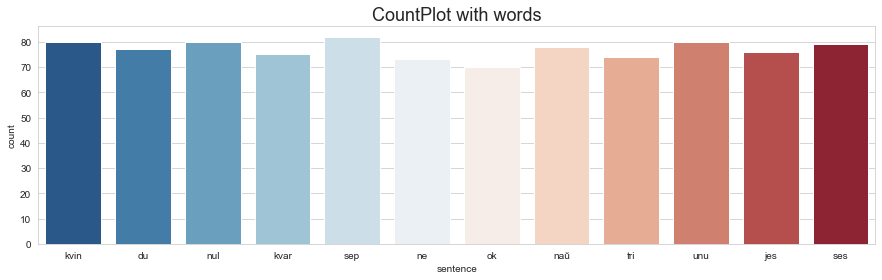

In [10]:
#load tsv in this language
#Ilia data paths
"""
eo_dev = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/eo/dev.tsv',sep='	')
eo_inval = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/eo/invalidated.tsv',sep='	')
eo_other = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/eo/other.tsv',sep='	')
eo_reported = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/eo/reported.tsv',sep='	')
eo_test = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/eo/test.tsv',sep='	')
eo_train = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/eo/train.tsv',sep='	')
eo_val = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/eo/validated.tsv',sep='	')
"""
#George data paths
eo_dev = pd.read_csv('gender data/eo/dev.tsv',sep='	')
eo_inval = pd.read_csv('gender data/eo/invalidated.tsv',sep='	')
eo_other = pd.read_csv('gender data/eo/other.tsv',sep='	')
eo_reported = pd.read_csv('gender data/eo/reported.tsv',sep='	')
eo_test = pd.read_csv('gender data/eo/test.tsv',sep='	')
eo_train = pd.read_csv('gender data/eo/train.tsv',sep='	')
eo_val = pd.read_csv('gender data/eo/validated.tsv',sep='	')

#keep the attributes that we need
eo_dev=eo_dev[['path','sentence','age','gender']]
eo_inval=eo_dev[['path','sentence','age','gender']]
eo_other=eo_other[['path','sentence','age','gender']]
eo_test=eo_test[['path','sentence','age','gender']]
eo_train=eo_train[['path','sentence','age','gender']]
eo_val=eo_val[['path','sentence','age','gender']]

#concatenation
eo_concat=pd.concat([eo_dev, eo_inval, eo_other, eo_test, eo_train, eo_val]).drop_duplicates()

#965 are all the voice records - 924 our instances
print('Counter for values:')
allLanguagesGenderCount['eo'] =eo_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=eo_concat['gender'],data=eo_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=eo_concat['sentence'],data=eo_concat,palette='RdBu_r');

## 10.Netherlands/ Dutch
<a id="Dutch"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0
male    11423  13485   4952  4345  1384  976  678  453  450  285.0
female   5655   4098   1231   802   479  122   66  147   45   32.0
other     176    442    131    44    13   14   12   10   10    NaN


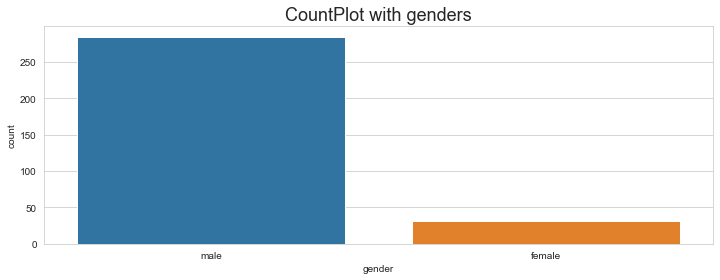

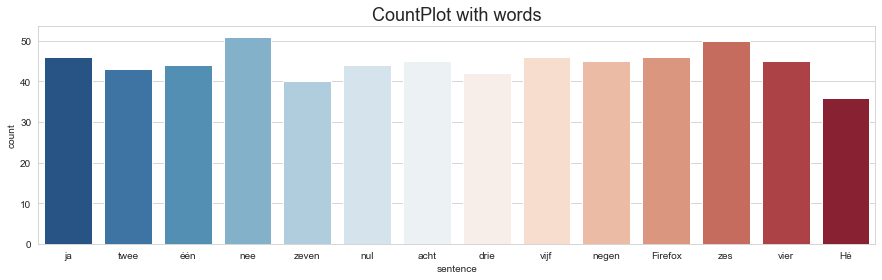

In [11]:
#load tsv in this language
#Ilia data paths
"""
nl_dev = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/nl/dev.tsv',sep='	')
nl_inval = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/nl/invalidated.tsv',sep='	')
nl_other = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/nl/other.tsv',sep='	')
nl_reported = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/nl/reported.tsv',sep='	')
nl_test = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/nl/test.tsv',sep='	')
nl_train = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/nl/train.tsv',sep='	')
nl_val = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/nl/validated.tsv',sep='	')
"""
#George data paths
nl_dev = pd.read_csv('gender data/nl/dev.tsv',sep='	')
nl_inval = pd.read_csv('gender data/nl/invalidated.tsv',sep='	')
nl_other = pd.read_csv('gender data/nl/other.tsv',sep='	')
nl_reported = pd.read_csv('gender data/nl/reported.tsv',sep='	')
nl_test = pd.read_csv('gender data/nl/test.tsv',sep='	')
nl_train = pd.read_csv('gender data/nl/train.tsv',sep='	')
nl_val = pd.read_csv('gender data/nl/validated.tsv',sep='	')

#keep the attributes that we need
nl_dev=nl_dev[['path','sentence','age','gender']]
nl_inval=nl_dev[['path','sentence','age','gender']]
nl_other=nl_other[['path','sentence','age','gender']]
nl_test=nl_test[['path','sentence','age','gender']]
nl_train=nl_train[['path','sentence','age','gender']]
nl_val=nl_val[['path','sentence','age','gender']]

#concatenation
nl_concat=pd.concat([nl_dev, nl_inval, nl_other, nl_test, nl_train, nl_val]).drop_duplicates()

#644 are all the voice records - 623 our instances
print('Counter for values:')
allLanguagesGenderCount['nl'] =nl_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=nl_concat['gender'],data=nl_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=nl_concat['sentence'],data=nl_concat,palette='RdBu_r');

## 11.Japanese
<a id="Japanese"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl   ja
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0  183
male    11423  13485   4952  4345  1384  976  678  453  450  285.0  266
female   5655   4098   1231   802   479  122   66  147   45   32.0  152
other     176    442    131    44    13   14   12   10   10    NaN    9


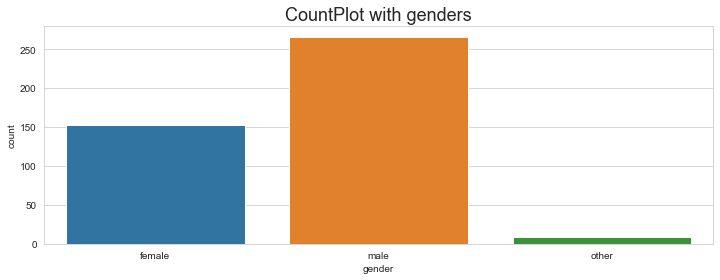

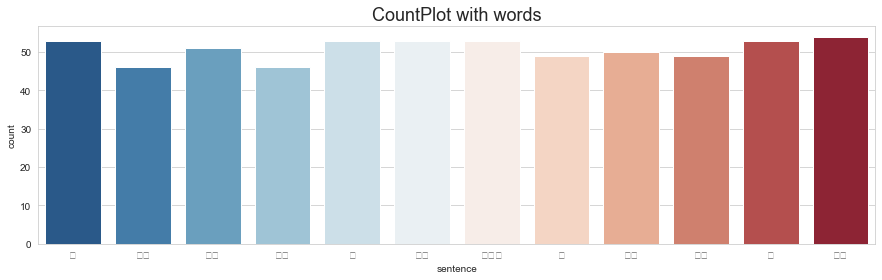

In [12]:
#load tsv in this language
#Ilia data paths
"""
ja_dev = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ja/dev.tsv',sep='	')
ja_inval = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ja/invalidated.tsv',sep='	')
ja_other = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ja/other.tsv',sep='	')
ja_reported = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ja/reported.tsv',sep='	')
ja_test = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ja/test.tsv',sep='	')
ja_train = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ja/train.tsv',sep='	')
ja_val = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ja/validated.tsv',sep='	')
"""
#George data paths
ja_dev = pd.read_csv('gender data/ja/dev.tsv',sep='	')
ja_inval = pd.read_csv('gender data/ja/invalidated.tsv',sep='	')
ja_other = pd.read_csv('gender data/ja/other.tsv',sep='	')
ja_reported = pd.read_csv('gender data/ja/reported.tsv',sep='	')
ja_test = pd.read_csv('gender data/ja/test.tsv',sep='	')
ja_train = pd.read_csv('gender data/ja/train.tsv',sep='	')
ja_val = pd.read_csv('gender data/ja/validated.tsv',sep='	')

#keep the attributes that we need
ja_dev=ja_dev[['path','sentence','age','gender']]
ja_inval=ja_dev[['path','sentence','age','gender']]
ja_other=ja_other[['path','sentence','age','gender']]
ja_test=ja_test[['path','sentence','age','gender']]
ja_train=ja_train[['path','sentence','age','gender']]
ja_val=ja_val[['path','sentence','age','gender']]

#concatenation
ja_concat=pd.concat([ja_dev, ja_inval, ja_other, ja_test, ja_train, ja_val]).drop_duplicates()

#644 are all the voice records - 610 our instances
print('Counter for values:')
allLanguagesGenderCount['ja'] =ja_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=ja_concat['gender'],data=ja_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=ja_concat['sentence'],data=ja_concat,palette='RdBu_r');

## 12.Euskaltzaindia - Basque language
<a id="Euskaltzaindia"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl   ja     eu
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0  183  460.0
male    11423  13485   4952  4345  1384  976  678  453  450  285.0  266  110.0
female   5655   4098   1231   802   479  122   66  147   45   32.0  152   52.0
other     176    442    131    44    13   14   12   10   10    NaN    9    NaN


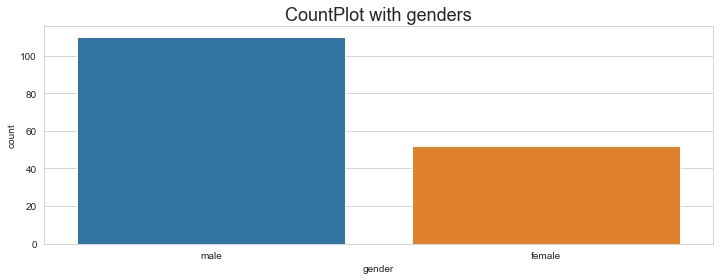

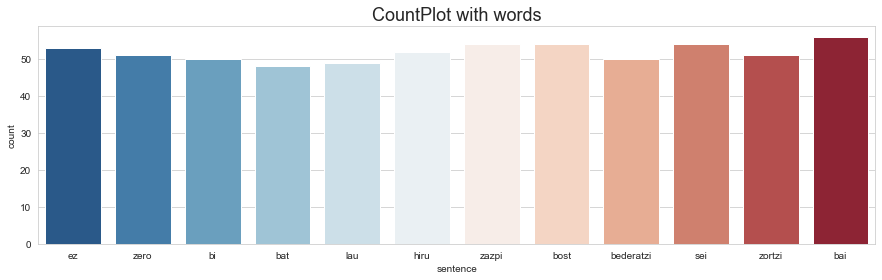

In [13]:
#load tsv in this language
#Ilia data paths
"""
eu_dev = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/eu/dev.tsv',sep='	')
eu_inval = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/eu/invalidated.tsv',sep='	')
eu_other = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/eu/other.tsv',sep='	')
eu_reported = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/eu/reported.tsv',sep='	')
eu_test = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/eu/test.tsv',sep='	')
eu_train = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/eu/train.tsv',sep='	')
eu_val = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/eu/validated.tsv',sep='	')
"""
#George data paths
eu_dev = pd.read_csv('gender data/eu/dev.tsv',sep='	')
eu_inval = pd.read_csv('gender data/eu/invalidated.tsv',sep='	')
eu_other = pd.read_csv('gender data/eu/other.tsv',sep='	')
eu_reported = pd.read_csv('gender data/eu/reported.tsv',sep='	')
eu_test = pd.read_csv('gender data/eu/test.tsv',sep='	')
eu_train = pd.read_csv('gender data/eu/train.tsv',sep='	')
eu_val = pd.read_csv('gender data/eu/validated.tsv',sep='	')

#keep the attributes that we need
eu_dev=eu_dev[['path','sentence','age','gender']]
eu_inval=eu_dev[['path','sentence','age','gender']]
eu_other=eu_other[['path','sentence','age','gender']]
eu_test=eu_test[['path','sentence','age','gender']]
eu_train=eu_train[['path','sentence','age','gender']]
eu_val=eu_val[['path','sentence','age','gender']]

#concatenation
eu_concat=pd.concat([eu_dev, eu_inval, eu_other, eu_test, eu_train, eu_val]).drop_duplicates()

#635 are all the voice records - 622 our instances
print('Counter for values:')
allLanguagesGenderCount['eu'] =eu_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=eu_concat['gender'],data=eu_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=eu_concat['sentence'],data=eu_concat,palette='RdBu_r');

## 13.Arabic
<a id="Arabic"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl   ja  \
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0  183   
male    11423  13485   4952  4345  1384  976  678  453  450  285.0  266   
female   5655   4098   1231   802   479  122   66  147   45   32.0  152   
other     176    442    131    44    13   14   12   10   10    NaN    9   

           eu     ar  
NaN     460.0  246.0  
male    110.0  231.0  
female   52.0   42.0  
other     NaN    NaN  


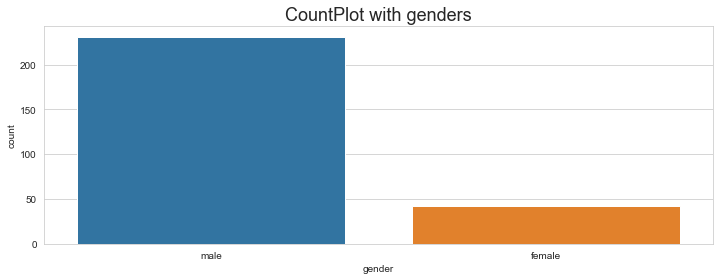

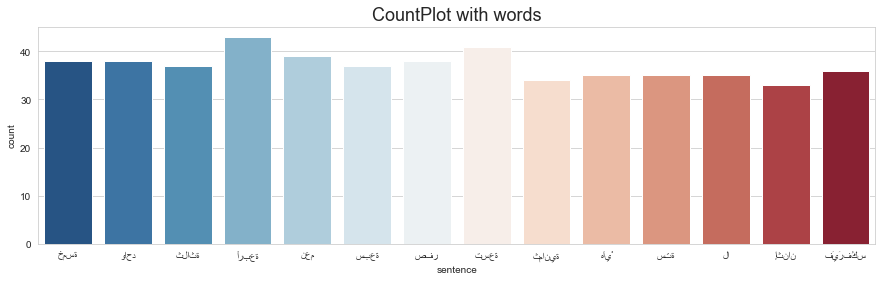

In [14]:
#load tsv in this language
#Ilia data paths
"""
ar_dev = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ar/dev.tsv',sep='	')
ar_inval = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ar/invalidated.tsv',sep='	')
ar_other = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ar/other.tsv',sep='	')
ar_reported = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ar/reported.tsv',sep='	')
ar_test = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ar/test.tsv',sep='	')
ar_train = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ar/train.tsv',sep='	')
ar_val = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ar/validated.tsv',sep='	')
"""
#George data paths
ar_dev = pd.read_csv('gender data/ar/dev.tsv',sep='	')
ar_inval = pd.read_csv('gender data/ar/invalidated.tsv',sep='	')
ar_other = pd.read_csv('gender data/ar/other.tsv',sep='	')
ar_reported = pd.read_csv('gender data/ar/reported.tsv',sep='	')
ar_test = pd.read_csv('gender data/ar/test.tsv',sep='	')
ar_train = pd.read_csv('gender data/ar/train.tsv',sep='	')
ar_val = pd.read_csv('gender data/ar/validated.tsv',sep='	')

#keep the attributes that we need
ar_dev=ar_dev[['path','sentence','age','gender']]
ar_inval=ar_dev[['path','sentence','age','gender']]
ar_other=ar_other[['path','sentence','age','gender']]
ar_test=ar_test[['path','sentence','age','gender']]
ar_train=ar_train[['path','sentence','age','gender']]
ar_val=ar_val[['path','sentence','age','gender']]

#concatenation 
ar_concat=pd.concat([ar_dev, ar_inval, ar_other, ar_test, ar_train, ar_val]).drop_duplicates()

#564 are all the voice records - 519 our instances
print('Counter for values:')
allLanguagesGenderCount['ar'] =ar_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=ar_concat['gender'],data=ar_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=ar_concat['sentence'],data=ar_concat,palette='RdBu_r');

## 14.Cymraeg - Welsh language
<a id="Cymraeg"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl   ja  \
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0  183   
male    11423  13485   4952  4345  1384  976  678  453  450  285.0  266   
female   5655   4098   1231   802   479  122   66  147   45   32.0  152   
other     176    442    131    44    13   14   12   10   10    NaN    9   

           eu     ar     cy  
NaN     460.0  246.0  291.0  
male    110.0  231.0  129.0  
female   52.0   42.0  118.0  
other     NaN    NaN    NaN  


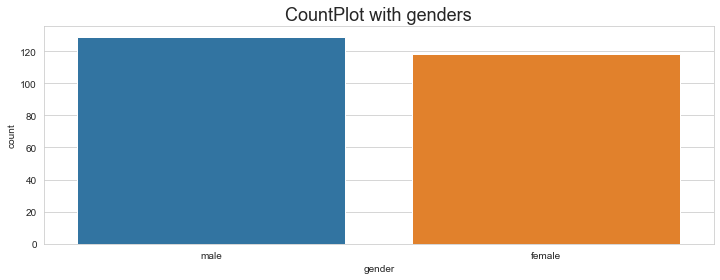

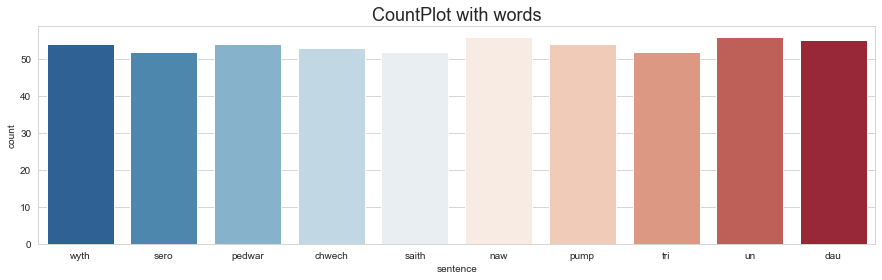

In [15]:
#load tsv in this language
#Ilia data paths
"""
cy_dev = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/cy/dev.tsv',sep='	')
cy_inval = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/cy/invalidated.tsv',sep='	')
cy_other = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/cy/other.tsv',sep='	')
cy_reported = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/cy/reported.tsv',sep='	')
cy_test = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/cy/test.tsv',sep='	')
cy_train = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/cy/train.tsv',sep='	')
cy_val = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/cy/validated.tsv',sep='	')
"""
#George data paths
cy_dev = pd.read_csv('gender data/cy/dev.tsv',sep='	')
cy_inval = pd.read_csv('gender data/cy/invalidated.tsv',sep='	')
cy_other = pd.read_csv('gender data/cy/other.tsv',sep='	')
cy_reported = pd.read_csv('gender data/cy/reported.tsv',sep='	')
cy_test = pd.read_csv('gender data/cy/test.tsv',sep='	')
cy_train = pd.read_csv('gender data/cy/train.tsv',sep='	')
cy_val = pd.read_csv('gender data/cy/validated.tsv',sep='	')

#keep the attributes that we need
cy_dev=cy_dev[['path','sentence','age','gender']]
cy_inval=cy_dev[['path','sentence','age','gender']]
cy_other=cy_other[['path','sentence','age','gender']]
cy_test=cy_test[['path','sentence','age','gender']]
cy_train=cy_train[['path','sentence','age','gender']]
cy_val=cy_val[['path','sentence','age','gender']]

#concatenation
cy_concat=pd.concat([cy_dev, cy_inval, cy_other, cy_test, cy_train, cy_val]).drop_duplicates()

#553 are all the voice records - 538 our instances
print('Counter for values:')
allLanguagesGenderCount['cy'] =cy_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=cy_concat['gender'],data=cy_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=cy_concat['sentence'],data=cy_concat,palette='RdBu_r');

## 15.Czech Republic
<a id="Czech"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl   ja  \
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0  183   
male    11423  13485   4952  4345  1384  976  678  453  450  285.0  266   
female   5655   4098   1231   802   479  122   66  147   45   32.0  152   
other     176    442    131    44    13   14   12   10   10    NaN    9   

           eu     ar     cy     cs  
NaN     460.0  246.0  291.0  370.0  
male    110.0  231.0  129.0  129.0  
female   52.0   42.0  118.0   29.0  
other     NaN    NaN    NaN    NaN  


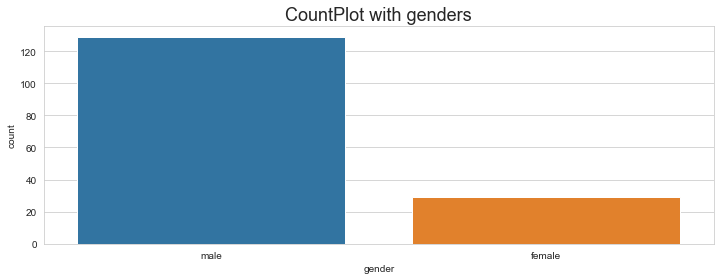

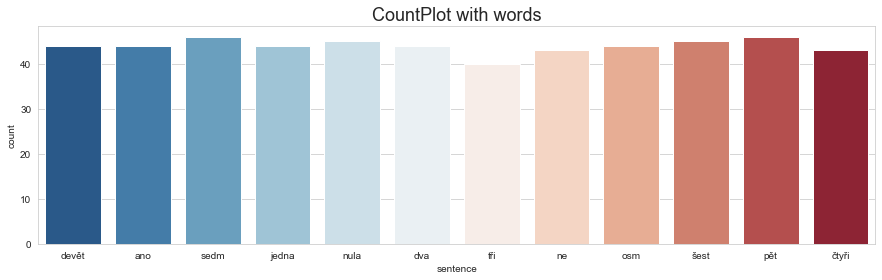

In [16]:
#load tsv in this language
#Ilia data paths
"""
cs_dev = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/cs/dev.tsv',sep='	')
cs_inval = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/cs/invalidated.tsv',sep='	')
cs_other = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/cs/other.tsv',sep='	')
cs_reported = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/cs/reported.tsv',sep='	')
cs_test = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/cs/test.tsv',sep='	')
cs_train = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/cs/train.tsv',sep='	')
cs_val = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/cs/validated.tsv',sep='	')
"""
#George data paths
cs_dev = pd.read_csv('gender data/cs/dev.tsv',sep='	')
cs_inval = pd.read_csv('gender data/cs/invalidated.tsv',sep='	')
cs_other = pd.read_csv('gender data/cs/other.tsv',sep='	')
cs_reported = pd.read_csv('gender data/cs/reported.tsv',sep='	')
cs_test = pd.read_csv('gender data/cs/test.tsv',sep='	')
cs_train = pd.read_csv('gender data/cs/train.tsv',sep='	')
cs_val = pd.read_csv('gender data/cs/validated.tsv',sep='	')

#keep the attributes that we need
cs_dev=cs_dev[['path','sentence','age','gender']]
cs_inval=cs_dev[['path','sentence','age','gender']]
cs_other=cs_other[['path','sentence','age','gender']]
cs_test=cs_test[['path','sentence','age','gender']]
cs_train=cs_train[['path','sentence','age','gender']]
cs_val=cs_val[['path','sentence','age','gender']]

#concatenation
cs_concat=pd.concat([cs_dev, cs_inval, cs_other, cs_test, cs_train, cs_val]).drop_duplicates()

#542 are all the voice records - 528 our instances
print('Counter for values:')
allLanguagesGenderCount['cs'] =cs_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=cs_concat['gender'],data=cs_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=cs_concat['sentence'],data=cs_concat,palette='RdBu_r');

## 16.Turkish
<a id="Turkish"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl   ja  \
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0  183   
male    11423  13485   4952  4345  1384  976  678  453  450  285.0  266   
female   5655   4098   1231   802   479  122   66  147   45   32.0  152   
other     176    442    131    44    13   14   12   10   10    NaN    9   

           eu     ar     cy     cs     tr  
NaN     460.0  246.0  291.0  370.0  240.0  
male    110.0  231.0  129.0  129.0  225.0  
female   52.0   42.0  118.0   29.0   26.0  
other     NaN    NaN    NaN    NaN    NaN  


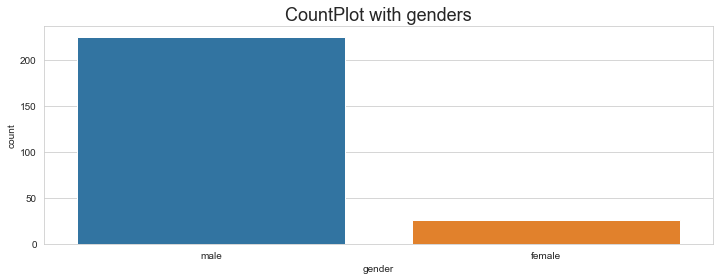

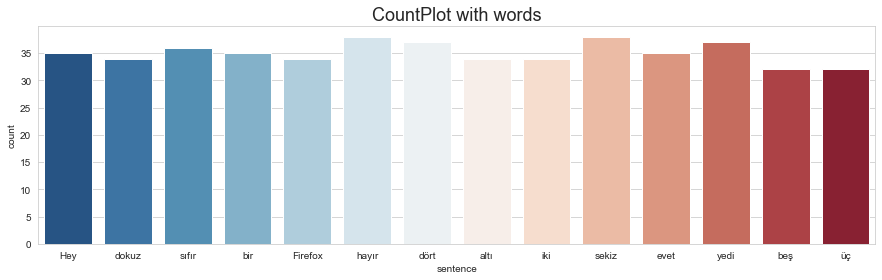

In [17]:
#load tsv in this language
#Ilia data paths
"""
tr_dev = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/tr/dev.tsv',sep='	')
tr_inval = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/tr/invalidated.tsv',sep='	')
tr_other = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/tr/other.tsv',sep='	')
tr_reported = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/tr/reported.tsv',sep='	')
tr_test = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/tr/test.tsv',sep='	')
tr_train = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/tr/train.tsv',sep='	')
tr_val = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/tr/validated.tsv',sep='	')
"""
#George data paths
tr_dev = pd.read_csv('gender data/tr/dev.tsv',sep='	')
tr_inval = pd.read_csv('gender data/tr/invalidated.tsv',sep='	')
tr_other = pd.read_csv('gender data/tr/other.tsv',sep='	')
tr_reported = pd.read_csv('gender data/tr/reported.tsv',sep='	')
tr_test = pd.read_csv('gender data/tr/test.tsv',sep='	')
tr_train = pd.read_csv('gender data/tr/train.tsv',sep='	')
tr_val = pd.read_csv('gender data/tr/validated.tsv',sep='	')

#keep the attributes that we need
tr_dev=tr_dev[['path','sentence','age','gender']]
tr_inval=tr_dev[['path','sentence','age','gender']]
tr_other=tr_other[['path','sentence','age','gender']]
tr_test=tr_test[['path','sentence','age','gender']]
tr_train=tr_train[['path','sentence','age','gender']]
tr_val=tr_val[['path','sentence','age','gender']]

#concatenation
tr_concat=pd.concat([tr_dev, tr_inval, tr_other, tr_test, tr_train, tr_val]).drop_duplicates()

#537 are all the voice records - 491 our instances
print('Counter for values:')
allLanguagesGenderCount['tr'] =tr_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=tr_concat['gender'],data=tr_concat);


#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=tr_concat['sentence'],data=tr_concat,palette='RdBu_r');

## 17.Kabyle
<a id="Kabyle"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl   ja  \
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0  183   
male    11423  13485   4952  4345  1384  976  678  453  450  285.0  266   
female   5655   4098   1231   802   479  122   66  147   45   32.0  152   
other     176    442    131    44    13   14   12   10   10    NaN    9   

           eu     ar     cy     cs     tr    kab  
NaN     460.0  246.0  291.0  370.0  240.0  216.0  
male    110.0  231.0  129.0  129.0  225.0  249.0  
female   52.0   42.0  118.0   29.0   26.0   27.0  
other     NaN    NaN    NaN    NaN    NaN    NaN  


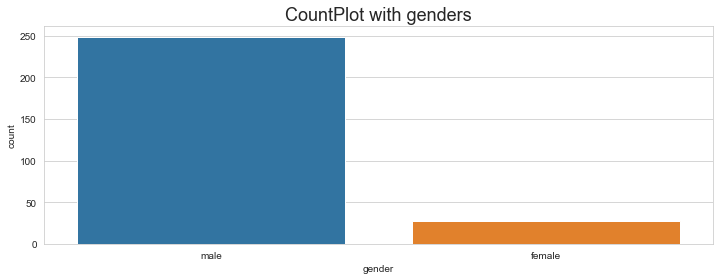

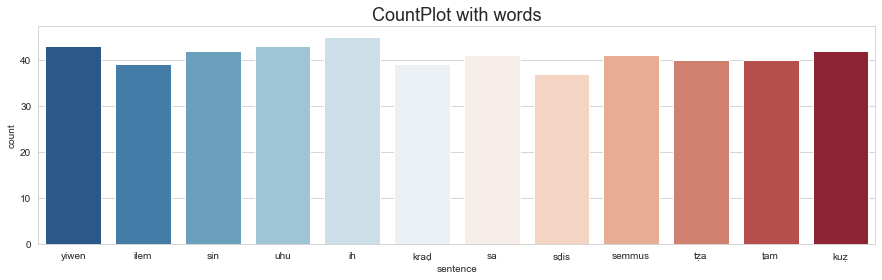

In [18]:
#load tsv in this language
#Ilia data paths
"""
kab_dev = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/kab/dev.tsv',sep='	')
kab_inval = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/kab/invalidated.tsv',sep='	')
kab_other = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/kab/other.tsv',sep='	')
kab_reported = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/kab/reported.tsv',sep='	')
kab_test = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/kab/test.tsv',sep='	')
kab_train = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/kab/train.tsv',sep='	')
kab_val = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/kab/validated.tsv',sep='	')
"""
#George data paths
kab_dev = pd.read_csv('gender data/kab/dev.tsv',sep='	')
kab_inval = pd.read_csv('gender data/kab/invalidated.tsv',sep='	')
kab_other = pd.read_csv('gender data/kab/other.tsv',sep='	')
kab_reported = pd.read_csv('gender data/kab/reported.tsv',sep='	')
kab_test = pd.read_csv('gender data/kab/test.tsv',sep='	')
kab_train = pd.read_csv('gender data/kab/train.tsv',sep='	')
kab_val = pd.read_csv('gender data/kab/validated.tsv',sep='	')

#keep the attributes that we need
kab_dev=kab_dev[['path','sentence','age','gender']]
kab_inval=kab_dev[['path','sentence','age','gender']]
kab_other=kab_other[['path','sentence','age','gender']]
kab_test=kab_test[['path','sentence','age','gender']]
kab_train=kab_train[['path','sentence','age','gender']]
kab_val=kab_val[['path','sentence','age','gender']]

#concatenation
kab_concat=pd.concat([kab_dev, kab_inval, kab_other, kab_test, kab_train, kab_val]).drop_duplicates()

#513 are all the voice records - 492 our instances
print('Counter for values:')
allLanguagesGenderCount['kab'] =kab_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=kab_concat['gender'],data=kab_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=kab_concat['sentence'],data=kab_concat,palette='RdBu_r');

## 18.Singapore (Mandarin Chinese)
<a id="Singapore"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl   ja  \
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0  183   
male    11423  13485   4952  4345  1384  976  678  453  450  285.0  266   
female   5655   4098   1231   802   479  122   66  147   45   32.0  152   
other     176    442    131    44    13   14   12   10   10    NaN    9   

           eu     ar     cy     cs     tr    kab     ta  
NaN     460.0  246.0  291.0  370.0  240.0  216.0  133.0  
male    110.0  231.0  129.0  129.0  225.0  249.0  119.0  
female   52.0   42.0  118.0   29.0   26.0   27.0   50.0  
other     NaN    NaN    NaN    NaN    NaN    NaN    NaN  


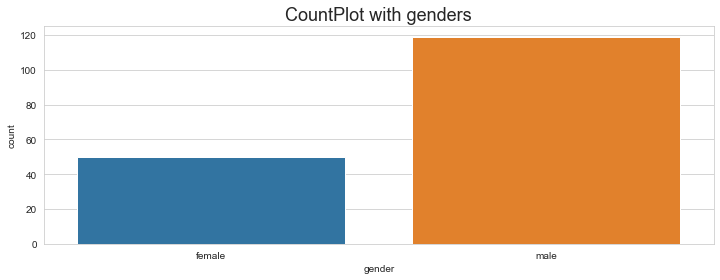

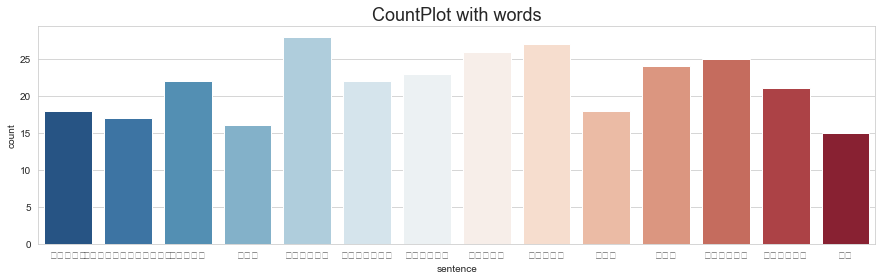

In [19]:
#load tsv in this language
#Ilia data paths
"""
ta_dev = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ta/dev.tsv',sep='	')
ta_inval = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ta/invalidated.tsv',sep='	')
ta_other = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ta/other.tsv',sep='	')
ta_reported = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ta/reported.tsv',sep='	')
ta_test = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ta/test.tsv',sep='	')
ta_train = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ta/train.tsv',sep='	')
ta_val = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ta/validated.tsv',sep='	')
"""
#George data paths
ta_dev = pd.read_csv('gender data/ta/dev.tsv',sep='	')
ta_inval = pd.read_csv('gender data/ta/invalidated.tsv',sep='	')
ta_other = pd.read_csv('gender data/ta/other.tsv',sep='	')
ta_reported = pd.read_csv('gender data/ta/reported.tsv',sep='	')
ta_test = pd.read_csv('gender data/ta/test.tsv',sep='	')
ta_train = pd.read_csv('gender data/ta/train.tsv',sep='	')
ta_val = pd.read_csv('gender data/ta/validated.tsv',sep='	')

#keep the attributes that we need
ta_dev=ta_dev[['path','sentence','age','gender']]
ta_inval=ta_dev[['path','sentence','age','gender']]
ta_other=ta_other[['path','sentence','age','gender']]
ta_test=ta_test[['path','sentence','age','gender']]
ta_train=ta_train[['path','sentence','age','gender']]
ta_val=ta_val[['path','sentence','age','gender']]

#concatenation
ta_concat=pd.concat([ta_dev, ta_inval, ta_other, ta_test, ta_train, ta_val]).drop_duplicates()

#341 are all the voice records - 302 our instances
print('Counter for values:')
allLanguagesGenderCount['ta'] =ta_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=ta_concat['gender'],data=ta_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=ta_concat['sentence'],data=ta_concat,palette='RdBu_r');

## 19.West Frisian
<a id="WestFrisian"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl   ja  \
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0  183   
male    11423  13485   4952  4345  1384  976  678  453  450  285.0  266   
female   5655   4098   1231   802   479  122   66  147   45   32.0  152   
other     176    442    131    44    13   14   12   10   10    NaN    9   

           eu     ar     cy     cs     tr    kab     ta  fy-NL  
NaN     460.0  246.0  291.0  370.0  240.0  216.0  133.0  170.0  
male    110.0  231.0  129.0  129.0  225.0  249.0  119.0   12.0  
female   52.0   42.0  118.0   29.0   26.0   27.0   50.0   21.0  
other     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  


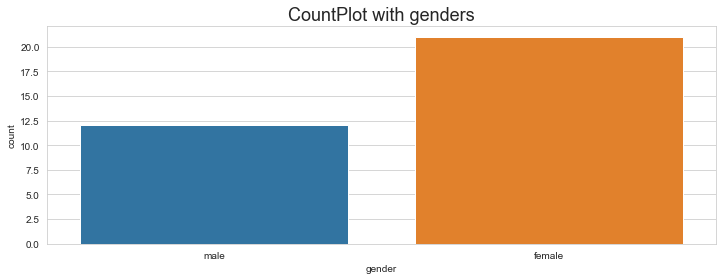

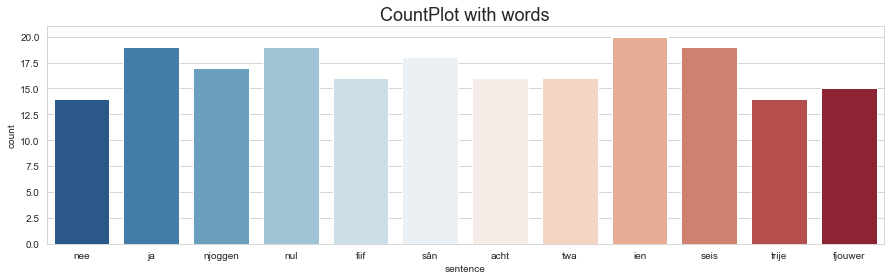

In [20]:
#load tsv in this language
#Ilia data paths
"""
fy_NLdev = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/fy-NL/dev.tsv',sep='	')
fy_NLinval = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/fy-NL/invalidated.tsv',sep='	')
fy_NLother = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/fy-NL/other.tsv',sep='	')
fy_NLreported = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/fy-NL/reported.tsv',sep='	')
fy_NLtest = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/fy-NL/test.tsv',sep='	')
fy_NLtrain = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/fy-NL/train.tsv',sep='	')
fy_NLval = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/fy-NL/validated.tsv',sep='	')
"""
#George data paths
fy_NLdev = pd.read_csv('gender data/fy-NL/dev.tsv',sep='	')
fy_NLinval = pd.read_csv('gender data/fy-NL/invalidated.tsv',sep='	')
fy_NLother = pd.read_csv('gender data/fy-NL/other.tsv',sep='	')
fy_NLreported = pd.read_csv('gender data/fy-NL/reported.tsv',sep='	')
fy_NLtest = pd.read_csv('gender data/fy-NL/test.tsv',sep='	')
fy_NLtrain = pd.read_csv('gender data/fy-NL/train.tsv',sep='	')
fy_NLval = pd.read_csv('gender data/fy-NL/validated.tsv',sep='	')

#keep the attributes that we need
fy_NLdev=fy_NLdev[['path','sentence','age','gender']]
fy_NLinval=fy_NLdev[['path','sentence','age','gender']]
fy_NLother=fy_NLother[['path','sentence','age','gender']]
fy_NLtest=fy_NLtest[['path','sentence','age','gender']]
fy_NLtrain=fy_NLtrain[['path','sentence','age','gender']]
fy_NLval=fy_NLval[['path','sentence','age','gender']]

#concatenation
fy_NLconcat=pd.concat([fy_NLdev, fy_NLinval, fy_NLother, fy_NLtest, fy_NLtrain, fy_NLval]).drop_duplicates()

#216 are all the voice records - 203 our instances
print('Counter for values:')
allLanguagesGenderCount['fy-NL'] =fy_NLconcat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=fy_NLconcat['gender'],data=fy_NLconcat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=fy_NLconcat['sentence'],data=fy_NLconcat,palette='RdBu_r');

## 20.Indonesian
<a id="Indonesian"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl   ja  \
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0  183   
male    11423  13485   4952  4345  1384  976  678  453  450  285.0  266   
female   5655   4098   1231   802   479  122   66  147   45   32.0  152   
other     176    442    131    44    13   14   12   10   10    NaN    9   

           eu     ar     cy     cs     tr    kab     ta  fy-NL  id  
NaN     460.0  246.0  291.0  370.0  240.0  216.0  133.0  170.0  55  
male    110.0  231.0  129.0  129.0  225.0  249.0  119.0   12.0  85  
female   52.0   42.0  118.0   29.0   26.0   27.0   50.0   21.0  12  
other     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   8  


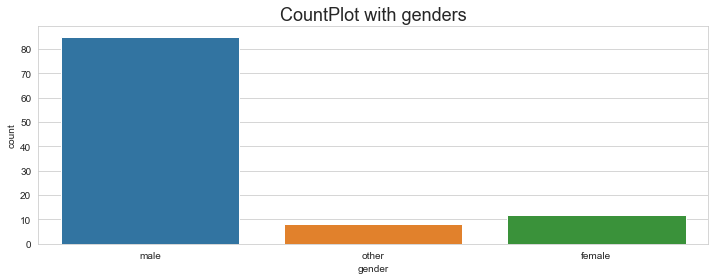

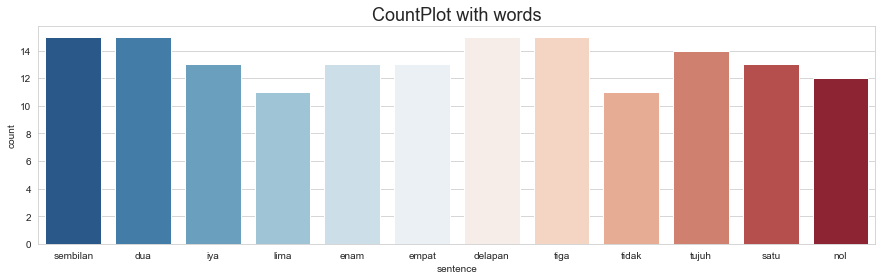

In [21]:
#load tsv in this language
#Ilia data paths
"""
id_dev = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/id/dev.tsv',sep='	')
id_inval = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/id/invalidated.tsv',sep='	')
id_other = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/id/other.tsv',sep='	')
id_reported = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/id/reported.tsv',sep='	')
id_test = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/id/test.tsv',sep='	')
id_train = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/id/train.tsv',sep='	')
id_val = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/id/validated.tsv',sep='	')
"""
#George data paths
id_dev = pd.read_csv('gender data/id/dev.tsv',sep='	')
id_inval = pd.read_csv('gender data/id/invalidated.tsv',sep='	')
id_other = pd.read_csv('gender data/id/other.tsv',sep='	')
id_reported = pd.read_csv('gender data/id/reported.tsv',sep='	')
id_test = pd.read_csv('gender data/id/test.tsv',sep='	')
id_train = pd.read_csv('gender data/id/train.tsv',sep='	')
id_val = pd.read_csv('gender data/id/validated.tsv',sep='	')

#keep the attributes that we need
id_dev=id_dev[['path','sentence','age','gender']]
id_inval=id_dev[['path','sentence','age','gender']]
id_other=id_other[['path','sentence','age','gender']]
id_test=id_test[['path','sentence','age','gender']]
id_train=id_train[['path','sentence','age','gender']]
id_val=id_val[['path','sentence','age','gender']]

#concatenation
id_concat=pd.concat([id_dev, id_inval, id_other, id_test, id_train, id_val]).drop_duplicates()

#171 are all the voice records - 160 our instances
print('Counter for values:')
allLanguagesGenderCount['id'] =id_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=id_concat['gender'],data=id_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=id_concat['sentence'],data=id_concat,palette='RdBu_r');

## 21.Cape Verde
<a id="CapeVerde"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl  ...  \
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0  ...   
male    11423  13485   4952  4345  1384  976  678  453  450  285.0  ...   
female   5655   4098   1231   802   479  122   66  147   45   32.0  ...   
other     176    442    131    44    13   14   12   10   10    NaN  ...   

           eu     ar     cy     cs     tr    kab     ta  fy-NL  id    cv  
NaN     460.0  246.0  291.0  370.0  240.0  216.0  133.0  170.0  55  20.0  
male    110.0  231.0  129.0  129.0  225.0  249.0  119.0   12.0  85  29.0  
female   52.0   42.0  118.0   29.0   26.0   27.0   50.0   21.0  12  16.0  
other     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   8   NaN  

[4 rows x 21 columns]


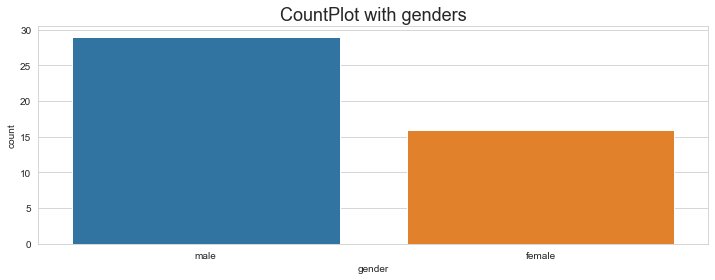

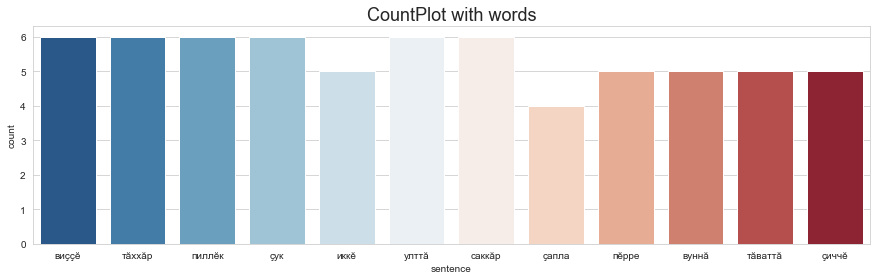

In [22]:
#load tsv in this language
#Ilia data paths
"""
cv_dev = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/cv/dev.tsv',sep='	')
cv_inval = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/cv/invalidated.tsv',sep='	')
cv_other = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/cv/other.tsv',sep='	')
cv_reported = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/cv/reported.tsv',sep='	')
cv_test = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/cv/test.tsv',sep='	')
cv_train = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/cv/train.tsv',sep='	')
cv_val = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/cv/validated.tsv',sep='	')
"""
#George data paths
cv_dev = pd.read_csv('gender data/cv/dev.tsv',sep='	')
cv_inval = pd.read_csv('gender data/cv/invalidated.tsv',sep='	')
cv_other = pd.read_csv('gender data/cv/other.tsv',sep='	')
cv_reported = pd.read_csv('gender data/cv/reported.tsv',sep='	')
cv_test = pd.read_csv('gender data/cv/test.tsv',sep='	')
cv_train = pd.read_csv('gender data/cv/train.tsv',sep='	')
cv_val = pd.read_csv('gender data/cv/validated.tsv',sep='	')

#keep the attributes that we need
cv_dev=cv_dev[['path','sentence','age','gender']]
cv_inval=cv_dev[['path','sentence','age','gender']]
cv_other=cv_other[['path','sentence','age','gender']]
cv_test=cv_test[['path','sentence','age','gender']]
cv_train=cv_train[['path','sentence','age','gender']]
cv_val=cv_val[['path','sentence','age','gender']]

#concatenation
cv_concat=pd.concat([cv_dev, cv_inval, cv_other, cv_test, cv_train, cv_val]).drop_duplicates()

#67 are all the voice records - 65 our instances
print('Counter for values:')
allLanguagesGenderCount['cv'] =cv_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=cv_concat['gender'],data=cv_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=cv_concat['sentence'],data=cv_concat,palette='RdBu_r');

## 22.Luganda
<a id="Luganda"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl  ...  \
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0  ...   
male    11423  13485   4952  4345  1384  976  678  453  450  285.0  ...   
female   5655   4098   1231   802   479  122   66  147   45   32.0  ...   
other     176    442    131    44    13   14   12   10   10    NaN  ...   

           ar     cy     cs     tr    kab     ta  fy-NL  id    cv    lg  
NaN     246.0  291.0  370.0  240.0  216.0  133.0  170.0  55  20.0  31.0  
male    231.0  129.0  129.0  225.0  249.0  119.0   12.0  85  29.0  10.0  
female   42.0  118.0   29.0   26.0   27.0   50.0   21.0  12  16.0  12.0  
other     NaN    NaN    NaN    NaN    NaN    NaN    NaN   8   NaN   NaN  

[4 rows x 22 columns]


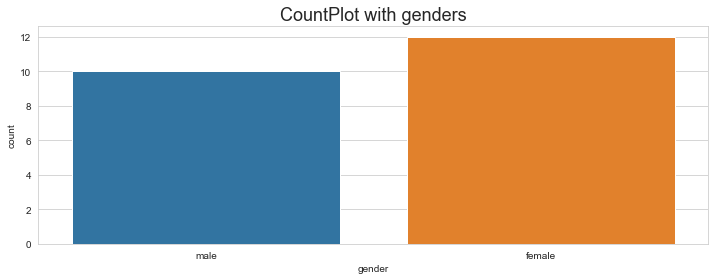

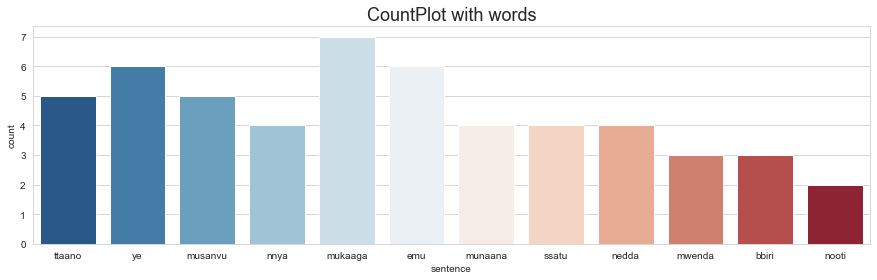

In [23]:
#load tsv in this language
#Ilia data paths
"""
lg_dev = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/lg/dev.tsv',sep='	')
lg_inval = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/lg/invalidated.tsv',sep='	')
lg_other = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/lg/other.tsv',sep='	')
lg_reported = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/lg/reported.tsv',sep='	')
lg_test = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/lg/test.tsv',sep='	')
lg_train = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/lg/train.tsv',sep='	')
lg_val = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/lg/validated.tsv',sep='	')
"""
#George data paths
lg_dev = pd.read_csv('gender data/lg/dev.tsv',sep='	')
lg_inval = pd.read_csv('gender data/lg/invalidated.tsv',sep='	')
lg_other = pd.read_csv('gender data/lg/other.tsv',sep='	')
lg_reported = pd.read_csv('gender data/lg/reported.tsv',sep='	')
lg_test = pd.read_csv('gender data/lg/test.tsv',sep='	')
lg_train = pd.read_csv('gender data/lg/train.tsv',sep='	')
lg_val = pd.read_csv('gender data/lg/validated.tsv',sep='	')

#keep the attributes that we need
lg_dev=lg_dev[['path','sentence','age','gender']]
lg_inval=lg_dev[['path','sentence','age','gender']]
lg_other=lg_other[['path','sentence','age','gender']]
lg_test=lg_test[['path','sentence','age','gender']]
lg_train=lg_train[['path','sentence','age','gender']]
lg_val=lg_val[['path','sentence','age','gender']]

#concatenation
lg_concat=pd.concat([lg_dev, lg_inval, lg_other, lg_test, lg_train, lg_val]).drop_duplicates()

#56 are all the voice records - 53 our instances
print('Counter for values:')
allLanguagesGenderCount['lg'] =lg_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=lg_concat['gender'],data=lg_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=lg_concat['sentence'],data=lg_concat,palette='RdBu_r');

## 23.Trinidad and Tobago
<a id="Trinidad"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl  ...  \
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0  ...   
male    11423  13485   4952  4345  1384  976  678  453  450  285.0  ...   
female   5655   4098   1231   802   479  122   66  147   45   32.0  ...   
other     176    442    131    44    13   14   12   10   10    NaN  ...   

           cy     cs     tr    kab     ta  fy-NL  id    cv    lg    tt  
NaN     291.0  370.0  240.0  216.0  133.0  170.0  55  20.0  31.0  30.0  
male    129.0  129.0  225.0  249.0  119.0   12.0  85  29.0  10.0  22.0  
female  118.0   29.0   26.0   27.0   50.0   21.0  12  16.0  12.0   1.0  
other     NaN    NaN    NaN    NaN    NaN    NaN   8   NaN   NaN   NaN  

[4 rows x 23 columns]


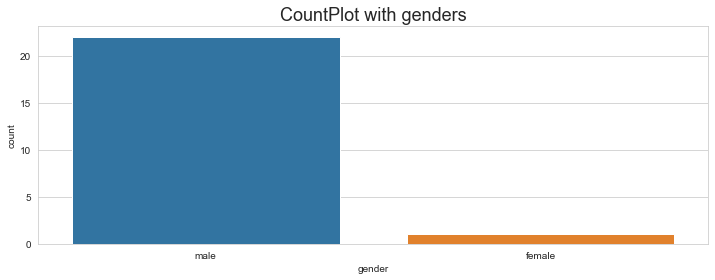

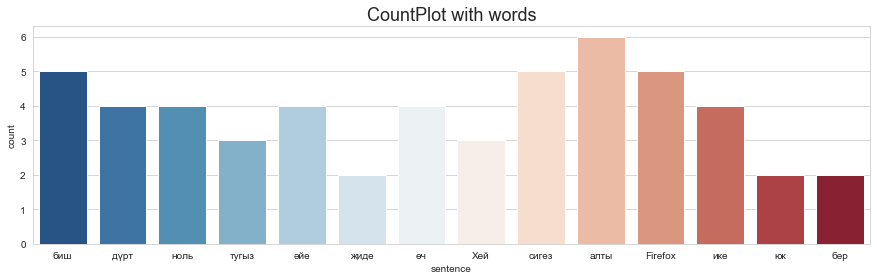

In [24]:
#load tsv in this language
#Ilia data paths
"""
tt_dev = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/tt/dev.tsv',sep='	')
tt_inval = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/tt/invalidated.tsv',sep='	')
tt_other = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/tt/other.tsv',sep='	')
tt_reported = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/tt/reported.tsv',sep='	')
tt_test = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/tt/test.tsv',sep='	')
tt_train = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/tt/train.tsv',sep='	')
tt_val = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/tt/validated.tsv',sep='	')
"""
#George data paths
tt_dev = pd.read_csv('gender data/tt/dev.tsv',sep='	')
tt_inval = pd.read_csv('gender data/tt/invalidated.tsv',sep='	')
tt_other = pd.read_csv('gender data/tt/other.tsv',sep='	')
tt_reported = pd.read_csv('gender data/tt/reported.tsv',sep='	')
tt_test = pd.read_csv('gender data/tt/test.tsv',sep='	')
tt_train = pd.read_csv('gender data/tt/train.tsv',sep='	')
tt_val = pd.read_csv('gender data/tt/validated.tsv',sep='	')

#keep the attributes that we need
tt_dev=tt_dev[['path','sentence','age','gender']]
tt_inval=tt_dev[['path','sentence','age','gender']]
tt_other=tt_other[['path','sentence','age','gender']]
tt_test=tt_test[['path','sentence','age','gender']]
tt_train=tt_train[['path','sentence','age','gender']]
tt_val=tt_val[['path','sentence','age','gender']]

#concatenation
tt_concat=pd.concat([tt_dev, tt_inval, tt_other, tt_test, tt_train, tt_val]).drop_duplicates()

#55 are all the voice records - 53 our instances
print('Counter for values:')
allLanguagesGenderCount['tt'] =tt_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=tt_concat['gender'],data=tt_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=tt_concat['sentence'],data=tt_concat,palette='RdBu_r');

## 24.Breton
<a id="Breton"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl  ...  \
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0  ...   
male    11423  13485   4952  4345  1384  976  678  453  450  285.0  ...   
female   5655   4098   1231   802   479  122   66  147   45   32.0  ...   
other     176    442    131    44    13   14   12   10   10    NaN  ...   

           cs     tr    kab     ta  fy-NL  id    cv    lg    tt    br  
NaN     370.0  240.0  216.0  133.0  170.0  55  20.0  31.0  30.0   9.0  
male    129.0  225.0  249.0  119.0   12.0  85  29.0  10.0  22.0  33.0  
female   29.0   26.0   27.0   50.0   21.0  12  16.0  12.0   1.0   NaN  
other     NaN    NaN    NaN    NaN    NaN   8   NaN   NaN   NaN   NaN  

[4 rows x 24 columns]


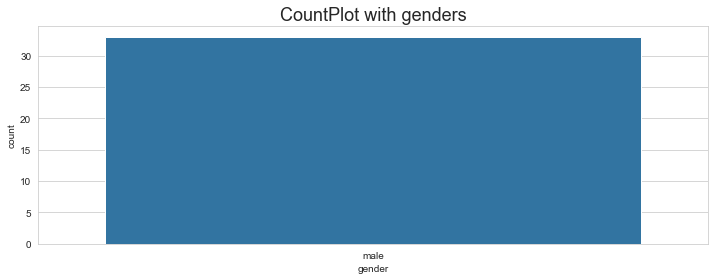

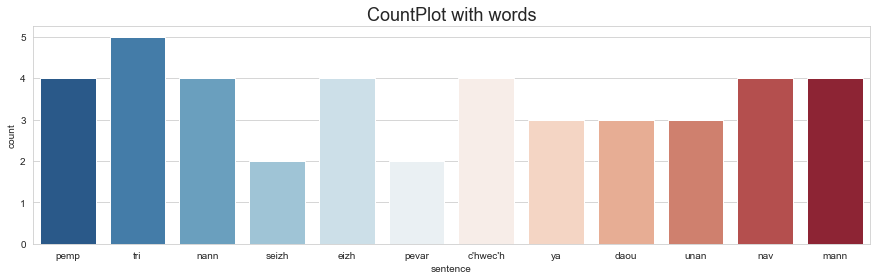

In [25]:
#load tsv in this language
#Ilia data paths
"""
br_dev = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/br/dev.tsv',sep='	')
br_inval = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/br/invalidated.tsv',sep='	')
br_other = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/br/other.tsv',sep='	')
br_reported = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/br/reported.tsv',sep='	')
br_test = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/br/test.tsv',sep='	')
br_train = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/br/train.tsv',sep='	')
br_val = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/br/validated.tsv',sep='	')
"""
#George data paths
br_dev = pd.read_csv('gender data/br/dev.tsv',sep='	')
br_inval = pd.read_csv('gender data/br/invalidated.tsv',sep='	')
br_other = pd.read_csv('gender data/br/other.tsv',sep='	')
br_reported = pd.read_csv('gender data/br/reported.tsv',sep='	')
br_test = pd.read_csv('gender data/br/test.tsv',sep='	')
br_train = pd.read_csv('gender data/br/train.tsv',sep='	')
br_val = pd.read_csv('gender data/br/validated.tsv',sep='	')

#keep the attributes that we need
br_dev=br_dev[['path','sentence','age','gender']]
br_inval=br_dev[['path','sentence','age','gender']]
br_other=br_other[['path','sentence','age','gender']]
br_test=br_test[['path','sentence','age','gender']]
br_train=br_train[['path','sentence','age','gender']]
br_val=br_val[['path','sentence','age','gender']]

#concatenation
br_concat=pd.concat([br_dev, br_inval, br_other, br_test, br_train, br_val]).drop_duplicates()

#42 are all the voice records - 42 our instances
print('Counter for values:')
allLanguagesGenderCount['br'] =br_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=br_concat['gender'],data=br_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=br_concat['sentence'],data=br_concat,palette='RdBu_r');

## 25.Georgian
<a id="Georgian"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl  ...  \
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0  ...   
male    11423  13485   4952  4345  1384  976  678  453  450  285.0  ...   
female   5655   4098   1231   802   479  122   66  147   45   32.0  ...   
other     176    442    131    44    13   14   12   10   10    NaN  ...   

           tr    kab     ta  fy-NL  id    cv    lg    tt    br    ka  
NaN     240.0  216.0  133.0  170.0  55  20.0  31.0  30.0   9.0  17.0  
male    225.0  249.0  119.0   12.0  85  29.0  10.0  22.0  33.0  12.0  
female   26.0   27.0   50.0   21.0  12  16.0  12.0   1.0   NaN   NaN  
other     NaN    NaN    NaN    NaN   8   NaN   NaN   NaN   NaN   NaN  

[4 rows x 25 columns]


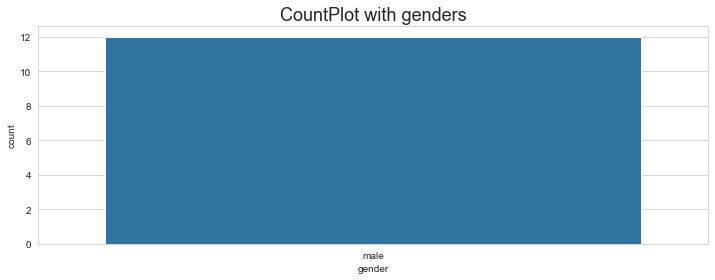

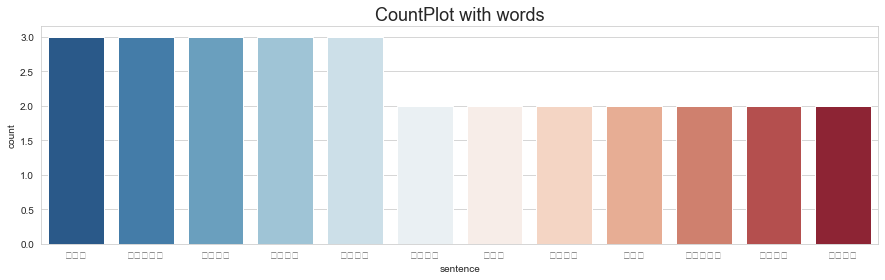

In [26]:
#load tsv in this language
#Ilia data paths
"""
ka_dev = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ka/dev.tsv',sep='	')
ka_inval = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ka/invalidated.tsv',sep='	')
ka_other = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ka/other.tsv',sep='	')
ka_reported = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ka/reported.tsv',sep='	')
ka_test = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ka/test.tsv',sep='	')
ka_train = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ka/train.tsv',sep='	')
ka_val = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ka/validated.tsv',sep='	')
"""
#George data paths
ka_dev = pd.read_csv('gender data/ka/dev.tsv',sep='	')
ka_inval = pd.read_csv('gender data/ka/invalidated.tsv',sep='	')
ka_other = pd.read_csv('gender data/ka/other.tsv',sep='	')
ka_reported = pd.read_csv('gender data/ka/reported.tsv',sep='	')
ka_test = pd.read_csv('gender data/ka/test.tsv',sep='	')
ka_train = pd.read_csv('gender data/ka/train.tsv',sep='	')
ka_val = pd.read_csv('gender data/ka/validated.tsv',sep='	')

#keep the attributes that we need
ka_dev=ka_dev[['path','sentence','age','gender']]
ka_inval=ka_dev[['path','sentence','age','gender']]
ka_other=ka_other[['path','sentence','age','gender']]
ka_test=ka_test[['path','sentence','age','gender']]
ka_train=ka_train[['path','sentence','age','gender']]
ka_val=ka_val[['path','sentence','age','gender']]

#concatenation
ka_concat=pd.concat([ka_dev, ka_inval, ka_other, ka_test, ka_train, ka_val]).drop_duplicates()

#29 are all the voice records - 29 our instances
print('Counter for values:')
allLanguagesGenderCount['ka'] =ka_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=ka_concat['gender'],data=ka_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=ka_concat['sentence'],data=ka_concat,palette='RdBu_r');

## 26.Swedish
<a id="Swedish"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl  ...  \
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0  ...   
male    11423  13485   4952  4345  1384  976  678  453  450  285.0  ...   
female   5655   4098   1231   802   479  122   66  147   45   32.0  ...   
other     176    442    131    44    13   14   12   10   10    NaN  ...   

          kab     ta  fy-NL  id    cv    lg    tt    br    ka  sv-SE  
NaN     216.0  133.0  170.0  55  20.0  31.0  30.0   9.0  17.0   15.0  
male    249.0  119.0   12.0  85  29.0  10.0  22.0  33.0  12.0    2.0  
female   27.0   50.0   21.0  12  16.0  12.0   1.0   NaN   NaN   12.0  
other     NaN    NaN    NaN   8   NaN   NaN   NaN   NaN   NaN    NaN  

[4 rows x 26 columns]


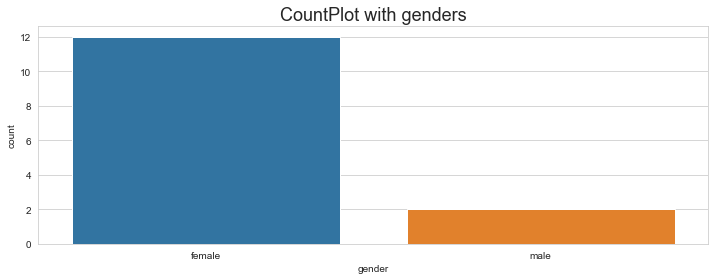

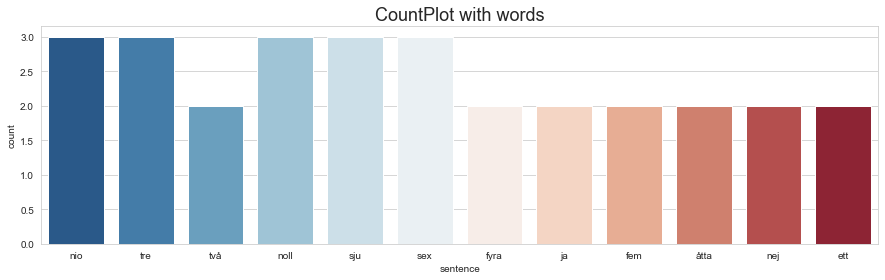

In [27]:
#load tsv in this language
#Ilia data paths
"""
sv_SE_dev = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ka/dev.tsv',sep='	')
sv_SE_inval = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ka/invalidated.tsv',sep='	')
sv_SE_other = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ka/other.tsv',sep='	')
sv_SE_reported = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ka/reported.tsv',sep='	')
sv_SE_test = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ka/test.tsv',sep='	')
sv_SE_train = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ka/train.tsv',sep='	')
sv_SE_val = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/ka/validated.tsv',sep='	')
"""
#George data paths
sv_SE_dev = pd.read_csv('gender data/sv-SE/dev.tsv',sep='	')
sv_SE_inval = pd.read_csv('gender data/sv-SE/invalidated.tsv',sep='	')
sv_SE_other = pd.read_csv('gender data/sv-SE/other.tsv',sep='	')
sv_SE_reported = pd.read_csv('gender data/sv-SE/reported.tsv',sep='	')
sv_SE_test = pd.read_csv('gender data/sv-SE/test.tsv',sep='	')
sv_SE_train = pd.read_csv('gender data/sv-SE/train.tsv',sep='	')
sv_SE_val = pd.read_csv('gender data/sv-SE/validated.tsv',sep='	')

#keep the attributes that we need
sv_SE_dev=sv_SE_dev[['path','sentence','age','gender']]
sv_SE_inval=sv_SE_dev[['path','sentence','age','gender']]
sv_SE_other=sv_SE_other[['path','sentence','age','gender']]
sv_SE_test=sv_SE_test[['path','sentence','age','gender']]
sv_SE_train=sv_SE_train[['path','sentence','age','gender']]
sv_SE_val=sv_SE_val[['path','sentence','age','gender']]

#concatenation
sv_SE_concat=pd.concat([sv_SE_dev, sv_SE_inval, sv_SE_other, sv_SE_test, sv_SE_train, sv_SE_val]).drop_duplicates()

#29 are all the voice records - 29 our instances
print('Counter for values:')
allLanguagesGenderCount['sv-SE'] =sv_SE_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=sv_SE_concat['gender'],data=sv_SE_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=sv_SE_concat['sentence'],data=sv_SE_concat,palette='RdBu_r');

## 27.Rwanda ( Kinyarwanda,English, French)
<a id="Rwanda"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl  ...  \
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0  ...   
male    11423  13485   4952  4345  1384  976  678  453  450  285.0  ...   
female   5655   4098   1231   802   479  122   66  147   45   32.0  ...   
other     176    442    131    44    13   14   12   10   10    NaN  ...   

           ta  fy-NL  id    cv    lg    tt    br    ka  sv-SE    rw  
NaN     133.0  170.0  55  20.0  31.0  30.0   9.0  17.0   15.0   4.0  
male    119.0   12.0  85  29.0  10.0  22.0  33.0  12.0    2.0  12.0  
female   50.0   21.0  12  16.0  12.0   1.0   NaN   NaN   12.0   NaN  
other     NaN    NaN   8   NaN   NaN   NaN   NaN   NaN    NaN   NaN  

[4 rows x 27 columns]


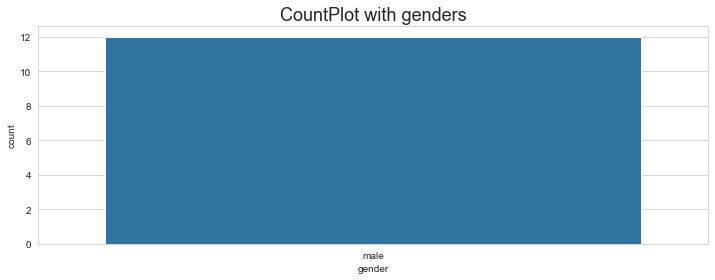

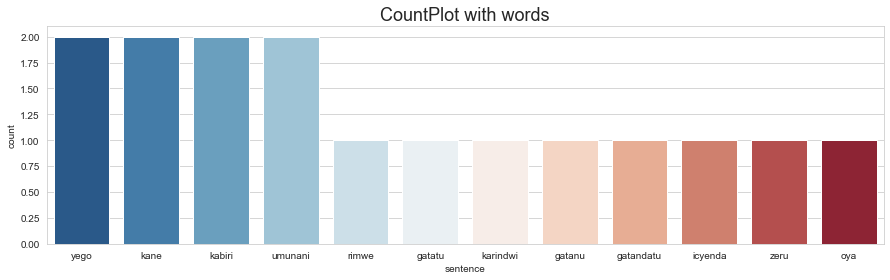

In [28]:
#load tsv in this language
#Ilia data paths
"""
rw_dev = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/rw/dev.tsv',sep='	')
rw_inval = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/rw/invalidated.tsv',sep='	')
rw_other = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/rw/other.tsv',sep='	')
rw_reported = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/rw/reported.tsv',sep='	')
rw_test = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/rw/test.tsv',sep='	')
rw_train = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/rw/train.tsv',sep='	')
rw_val = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/rw/validated.tsv',sep='	')
"""
#George data paths
rw_dev = pd.read_csv('gender data/rw/dev.tsv',sep='	')
rw_inval = pd.read_csv('gender data/rw/invalidated.tsv',sep='	')
rw_other = pd.read_csv('gender data/rw/other.tsv',sep='	')
rw_reported = pd.read_csv('gender data/rw/reported.tsv',sep='	')
rw_test = pd.read_csv('gender data/rw/test.tsv',sep='	')
rw_train = pd.read_csv('gender data/rw/train.tsv',sep='	')
rw_val = pd.read_csv('gender data/rw/validated.tsv',sep='	')

#keep the attributes that we need
rw_dev=rw_dev[['path','sentence','age','gender']]
rw_inval=rw_dev[['path','sentence','age','gender']]
rw_other=rw_other[['path','sentence','age','gender']]
rw_test=rw_test[['path','sentence','age','gender']]
rw_train=rw_train[['path','sentence','age','gender']]
rw_val=rw_val[['path','sentence','age','gender']]

#concatenation
rw_concat=pd.concat([rw_dev, rw_inval, rw_other, rw_test, rw_train, rw_val]).drop_duplicates()

#16 are all the voice records - 16 our instances
print('Counter for values:')
allLanguagesGenderCount['rw'] =rw_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=rw_concat['gender'],data=rw_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=rw_concat['sentence'],data=rw_concat,palette='RdBu_r');

## 28.Chinese (Traditional, Hong Kong S.A.R.)
<a id="ChineseTraditional"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl  ...  \
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0  ...   
male    11423  13485   4952  4345  1384  976  678  453  450  285.0  ...   
female   5655   4098   1231   802   479  122   66  147   45   32.0  ...   
other     176    442    131    44    13   14   12   10   10    NaN  ...   

        fy-NL  id    cv    lg    tt    br    ka  sv-SE    rw  zh_HK  
NaN     170.0  55  20.0  31.0  30.0   9.0  17.0   15.0   4.0  349.0  
male     12.0  85  29.0  10.0  22.0  33.0  12.0    2.0  12.0  100.0  
female   21.0  12  16.0  12.0   1.0   NaN   NaN   12.0   NaN   33.0  
other     NaN   8   NaN   NaN   NaN   NaN   NaN    NaN   NaN    NaN  

[4 rows x 28 columns]


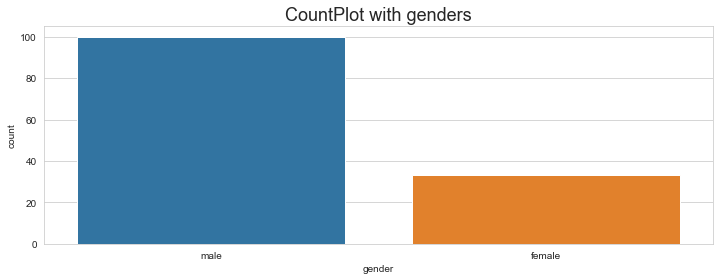

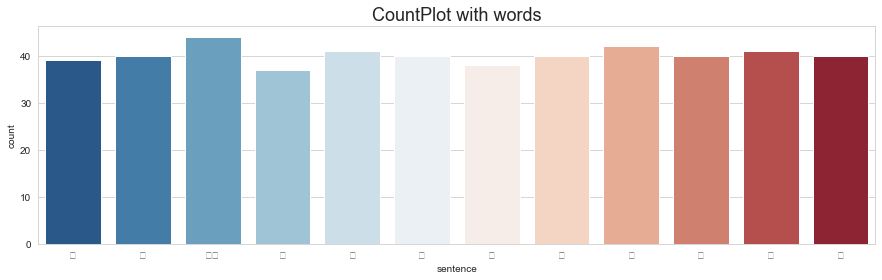

In [29]:
#load tsv in this language
#Ilia data paths
"""
zh_HK_dev = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/zh-HK/dev.tsv',sep='	')
zh_HK_inval = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/zh-HK/invalidated.tsv',sep='	')
zh_HK_other = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/zh-HK/other.tsv',sep='	')
zh_HK_reported = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/zh-HK/reported.tsv',sep='	')
zh_HK_test = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/zh-HK/test.tsv',sep='	')
zh_HK_train = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/zh-HK/train.tsv',sep='	')
zh_HK_val = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/zh-HK/validated.tsv',sep='	')
"""
#George data paths
zh_HK_dev = pd.read_csv('gender data/zh-HK/dev.tsv',sep='	')
zh_HK_inval = pd.read_csv('gender data/zh-HK/invalidated.tsv',sep='	')
zh_HK_other = pd.read_csv('gender data/zh-HK/other.tsv',sep='	')
zh_HK_reported = pd.read_csv('gender data/zh-HK/reported.tsv',sep='	')
zh_HK_test = pd.read_csv('gender data/zh-HK/test.tsv',sep='	')
zh_HK_train = pd.read_csv('gender data/zh-HK/train.tsv',sep='	')
zh_HK_val = pd.read_csv('gender data/zh-HK/validated.tsv',sep='	')

#keep the attributes that we need
zh_HK_dev=zh_HK_dev[['path','sentence','age','gender']]
zh_HK_inval=zh_HK_dev[['path','sentence','age','gender']]
zh_HK_other=zh_HK_other[['path','sentence','age','gender']]
zh_HK_test=zh_HK_test[['path','sentence','age','gender']]
zh_HK_train=zh_HK_train[['path','sentence','age','gender']]
zh_HK_val=zh_HK_val[['path','sentence','age','gender']]

#concatenation
zh_HK_concat=pd.concat([zh_HK_dev, zh_HK_inval, zh_HK_other, zh_HK_test, zh_HK_train, zh_HK_val]).drop_duplicates()

#503 are all the voice records - 482 our instances
print('Counter for values:')
allLanguagesGenderCount['zh_HK'] =zh_HK_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=zh_HK_concat['gender'],data=zh_HK_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=zh_HK_concat['sentence'],data=zh_HK_concat,palette='RdBu_r');

## 29.Chinese (PRC=People's Republic of China)
<a id="Chinese"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl  ...  id  \
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0  ...  55   
male    11423  13485   4952  4345  1384  976  678  453  450  285.0  ...  85   
female   5655   4098   1231   802   479  122   66  147   45   32.0  ...  12   
other     176    442    131    44    13   14   12   10   10    NaN  ...   8   

          cv    lg    tt    br    ka  sv-SE    rw  zh_HK  zh_CN  
NaN     20.0  31.0  30.0   9.0  17.0   15.0   4.0  349.0  147.0  
male    29.0  10.0  22.0  33.0  12.0    2.0  12.0  100.0  117.0  
female  16.0  12.0   1.0   NaN   NaN   12.0   NaN   33.0   31.0  
other    NaN   NaN   NaN   NaN   NaN    NaN   NaN    NaN    NaN  

[4 rows x 29 columns]


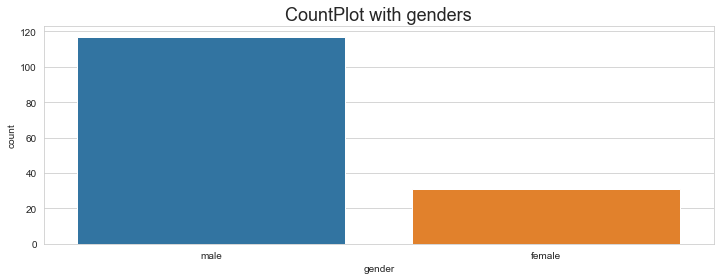

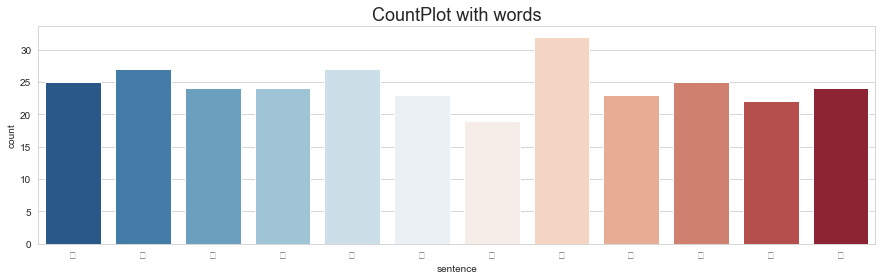

In [30]:
#load tsv in this language
#Ilia data paths
"""
zh_CN_dev = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/zh-CN/dev.tsv',sep='	')
zh_CN_inval = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/zh-CN/invalidated.tsv',sep='	')
zh_CN_other = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/zh-CN/other.tsv',sep='	')
zh_CN_reported = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/zh-CN/reported.tsv',sep='	')
zh_CN_test = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/zh-CN/test.tsv',sep='	')
zh_CN_train = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/zh-CN/train.tsv',sep='	')
zh_CN_val = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/zh-CN/validated.tsv',sep='	')
"""
#George data paths
zh_CN_dev = pd.read_csv('gender data/zh-CN/dev.tsv',sep='	')
zh_CN_inval = pd.read_csv('gender data/zh-CN/invalidated.tsv',sep='	')
zh_CN_other = pd.read_csv('gender data/zh-CN/other.tsv',sep='	')
zh_CN_reported = pd.read_csv('gender data/zh-CN/reported.tsv',sep='	')
zh_CN_test = pd.read_csv('gender data/zh-CN/test.tsv',sep='	')
zh_CN_train = pd.read_csv('gender data/zh-CN/train.tsv',sep='	')
zh_CN_val = pd.read_csv('gender data/zh-CN/validated.tsv',sep='	')

#keep the attributes that we need
zh_CN_dev=zh_CN_dev[['path','sentence','age','gender']]
zh_CN_inval=zh_CN_dev[['path','sentence','age','gender']]
zh_CN_other=zh_CN_other[['path','sentence','age','gender']]
zh_CN_test=zh_CN_test[['path','sentence','age','gender']]
zh_CN_train=zh_CN_train[['path','sentence','age','gender']]
zh_CN_val=zh_CN_val[['path','sentence','age','gender']]

#concatenation
zh_CN_concat=pd.concat([zh_CN_dev, zh_CN_inval, zh_CN_other, zh_CN_test, zh_CN_train, zh_CN_val]).drop_duplicates()

#319 are all the voice records - 295 our instances
print('Counter for values:')
allLanguagesGenderCount['zh_CN'] =zh_CN_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=zh_CN_concat['gender'],data=zh_CN_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=zh_CN_concat['sentence'],data=zh_CN_concat,palette='RdBu_r');

## 30.Chinese (Taiwan)
<a id="Taiwan"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl  ...    cv  \
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0  ...  20.0   
male    11423  13485   4952  4345  1384  976  678  453  450  285.0  ...  29.0   
female   5655   4098   1231   802   479  122   66  147   45   32.0  ...  16.0   
other     176    442    131    44    13   14   12   10   10    NaN  ...   NaN   

          lg    tt    br    ka  sv-SE    rw  zh_HK  zh_CN  zh_TW  
NaN     31.0  30.0   9.0  17.0   15.0   4.0  349.0  147.0   10.0  
male    10.0  22.0  33.0  12.0    2.0  12.0  100.0  117.0   17.0  
female  12.0   1.0   NaN   NaN   12.0   NaN   33.0   31.0    NaN  
other    NaN   NaN   NaN   NaN    NaN   NaN    NaN    NaN    NaN  

[4 rows x 30 columns]


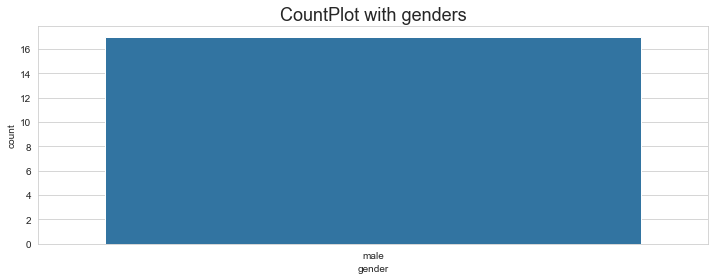

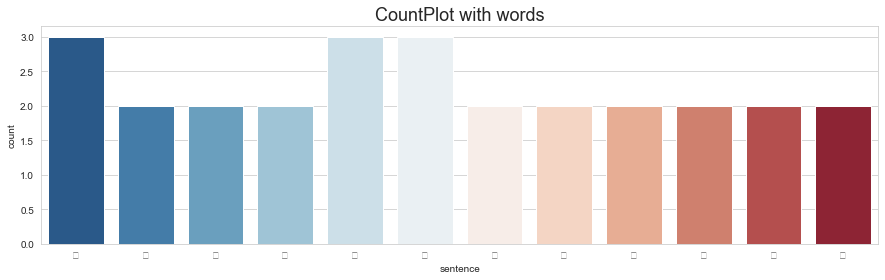

In [31]:
#load tsv in this language
#Ilia data paths
"""
zh_TW_dev = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/zh-TW/dev.tsv',sep='	')
zh_TW_inval = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/zh-TW/invalidated.tsv',sep='	')
zh_TW_other = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/zh-TW/other.tsv',sep='	')
zh_TW_reported = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/zh-TW/reported.tsv',sep='	')
zh_TW_test = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/zh-TW/test.tsv',sep='	')
zh_TW_train = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/zh-TW/train.tsv',sep='	')
zh_TW_val = pd.read_csv('E:/MSC/ΜSc In Data Science/Semester2/DL/Assigment/Data/cv-corpus-6.1-singleword/zh-TW/validated.tsv',sep='	')
"""
#George data paths
zh_TW_dev = pd.read_csv('gender data/zh-TW/dev.tsv',sep='	')
zh_TW_inval = pd.read_csv('gender data/zh-TW/invalidated.tsv',sep='	')
zh_TW_other = pd.read_csv('gender data/zh-TW/other.tsv',sep='	')
zh_TW_reported = pd.read_csv('gender data/zh-TW/reported.tsv',sep='	')
zh_TW_test = pd.read_csv('gender data/zh-TW/test.tsv',sep='	')
zh_TW_train = pd.read_csv('gender data/zh-TW/train.tsv',sep='	')
zh_TW_val = pd.read_csv('gender data/zh-TW/validated.tsv',sep='	')

#keep the attributes that we need
zh_TW_dev=zh_TW_dev[['path','sentence','age','gender']]
zh_TW_inval=zh_TW_dev[['path','sentence','age','gender']]
zh_TW_other=zh_TW_other[['path','sentence','age','gender']]
zh_TW_test=zh_TW_test[['path','sentence','age','gender']]
zh_TW_train=zh_TW_train[['path','sentence','age','gender']]
zh_TW_val=zh_TW_val[['path','sentence','age','gender']]

#concatenation
zh_TW_concat=pd.concat([zh_TW_dev, zh_TW_inval, zh_TW_other, zh_TW_test, zh_TW_train, zh_TW_val]).drop_duplicates()

#319 are all the voice records - 295 our instances
print('Counter for values:')
allLanguagesGenderCount['zh_TW'] =zh_TW_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=zh_TW_concat['gender'],data=zh_TW_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=zh_TW_concat['sentence'],data=zh_TW_concat,palette='RdBu_r');

## Summary 

In [32]:
allLanguagesGenderCount['SUM'] = allLanguagesGenderCount.sum(axis=1)

pd.set_option('display.max_columns', None)
display(allLanguagesGenderCount)

#scroll right to see the sum

,es,en,fr,de,ca,ru,pt,pl,eo,nl,ja,eu,ar,cy,cs,tr,kab,ta,fy-NL,id,cv,lg,tt,br,ka,sv-SE,rw,zh_HK,zh_CN,zh_TW,SUM
NaN,46242,27274,13723,8513,2087,979,464,535,419,306.0,183,460.0,246.0,291.0,370.0,240.0,216.0,133.0,170.0,55,20.0,31.0,30.0,9.0,17.0,15.0,4.0,349.0,147.0,10.0,103538.0
male,11423,13485,4952,4345,1384,976,678,453,450,285.0,266,110.0,231.0,129.0,129.0,225.0,249.0,119.0,12.0,85,29.0,10.0,22.0,33.0,12.0,2.0,12.0,100.0,117.0,17.0,40340.0
female,5655,4098,1231,802,479,122,66,147,45,32.0,152,52.0,42.0,118.0,29.0,26.0,27.0,50.0,21.0,12,16.0,12.0,1.0,NaN,NaN,12.0,NaN,33.0,31.0,NaN,13311.0
other,176,442,131,44,13,14,12,10,10,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,869.0


In [33]:
import time
import librosa
#y, sr = librosa.load('/Users/giorgoslertas/Desktop/DL_project/gender data/en/clips/common_voice_en_22216022.mp3')
#y, sr = librosa.load(librosa.util.example_audio_file(), duration=5.0)
